In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
import os
#for dylan
#os.environ['PYSPARK_PYTHON'] = '/anaconda/bin/python'

#for oneil
os.environ['PYSPARK_PYTHON'] = '/Users/oneil/anaconda/bin/python'

In [3]:
import findspark
findspark.init()
print findspark.find()

/usr/local/opt/apache-spark/libexec


In [4]:
import pyspark
conf = (pyspark.SparkConf()
    .setMaster('local')
    .setAppName('pyspark')
    .set("spark.executor.memory", "2g"))
sc = pyspark.SparkContext(conf=conf)

In [5]:
import sys
rdd = sc.parallelize(xrange(10),10)
rdd.map(lambda x: sys.version).collect()

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 0.0 failed 1 times, most recent failure: Lost task 0.0 in stage 0.0 (TID 0, localhost): java.io.IOException: Cannot run program "/Users/oneil/anaconda/bin/python": error=2, No such file or directory
	at java.lang.ProcessBuilder.start(ProcessBuilder.java:1048)
	at org.apache.spark.api.python.PythonWorkerFactory.startDaemon(PythonWorkerFactory.scala:160)
	at org.apache.spark.api.python.PythonWorkerFactory.createThroughDaemon(PythonWorkerFactory.scala:86)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:62)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:135)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:101)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:70)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:300)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:264)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:66)
	at org.apache.spark.scheduler.Task.run(Task.scala:88)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:214)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1142)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:617)
	at java.lang.Thread.run(Thread.java:745)
Caused by: java.io.IOException: error=2, No such file or directory
	at java.lang.UNIXProcess.forkAndExec(Native Method)
	at java.lang.UNIXProcess.<init>(UNIXProcess.java:185)
	at java.lang.ProcessImpl.start(ProcessImpl.java:134)
	at java.lang.ProcessBuilder.start(ProcessBuilder.java:1029)
	... 14 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1283)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1271)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1270)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:47)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1270)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:697)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:697)
	at scala.Option.foreach(Option.scala:236)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:697)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1496)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1458)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1447)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:567)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1824)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1837)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1850)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1921)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:909)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:147)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:108)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:310)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:908)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:405)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:483)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:231)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:379)
	at py4j.Gateway.invoke(Gateway.java:259)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:133)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:207)
	at java.lang.Thread.run(Thread.java:745)
Caused by: java.io.IOException: Cannot run program "/Users/oneil/anaconda/bin/python": error=2, No such file or directory
	at java.lang.ProcessBuilder.start(ProcessBuilder.java:1048)
	at org.apache.spark.api.python.PythonWorkerFactory.startDaemon(PythonWorkerFactory.scala:160)
	at org.apache.spark.api.python.PythonWorkerFactory.createThroughDaemon(PythonWorkerFactory.scala:86)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:62)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:135)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:101)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:70)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:300)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:264)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:66)
	at org.apache.spark.scheduler.Task.run(Task.scala:88)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:214)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1142)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:617)
	... 1 more
Caused by: java.io.IOException: error=2, No such file or directory
	at java.lang.UNIXProcess.forkAndExec(Native Method)
	at java.lang.UNIXProcess.<init>(UNIXProcess.java:185)
	at java.lang.ProcessImpl.start(ProcessImpl.java:134)
	at java.lang.ProcessBuilder.start(ProcessBuilder.java:1029)
	... 14 more


In [6]:
sys.version

'2.7.10 |Continuum Analytics, Inc.| (default, Oct 19 2015, 18:31:17) \n[GCC 4.2.1 (Apple Inc. build 5577)]'

In [6]:
from pyspark.sql import SQLContext
sqlsc=SQLContext(sc)

In [2]:
## ABOVE IS SPARK SET UP,
## THIS IS PANDAS

index_df=pd.read_csv("index.csv")
print "Shape: " + str(index_df.shape)
index_df.head()

Shape: (3000, 15)


Entry_No Source   DNA_UNIQUE_ID                  DNA_Designation DNA_Accno_source DNA_VARNAME_source DNA_Othername_source  ORI_COUNTRY   Unnamed: 8 Genetic_Stock_Accno Genetic_stock_Designation(varname)  total seq count  passed qc seq count depth Variety Group (Tree)1
0       65   IRRI   IRIS 313-9783     BERENJ 1277 S::IRGC 3461-1-1        IRGC 3461      BERENJ 1277 S                  NaN  AFGHANISTAN  Afghanistan         IRGC 121902         BERENJ 1277 S::IRGC 3461-1              NaN                  NaN   NaN              Japonica
1     1632   IRRI  IRIS 313-10509          AMBARIKORI::IRGC 5132-1        IRGC 5132         AMBARIKORI                  NaN       AFRICA       Africa         IRGC 127120            AMBARIKORI::IRGC 5132-1              NaN                  NaN   NaN                Indica
2      913   IRRI   IRIS 313-8128  PRECOZ 2 F A::GERVEX 1182-C1-G1              NaN       PRECOZ 2 F A                  NaN    Argentina    Argentina         IRGC 122208       PRECOZ 2 F A::GERVEX 1182-C1         51623044             51623044  10.7                Indica
3      363   IRRI   IRIS 313-9778             GENIT::IRGC 3272-1-1        IRGC 3272              GENIT                  NaN    ARGENTINA    Argentina         IRGC 125751                 GENIT::IRGC 3272-1         66457214             60982350  12.7                Indica
4      872   IRRI   IRIS 313-8063       104 UPLA::GERVEX 167-C1-G1              NaN           104 UPLA                  NaN    Argentina    Argentina         IRGC 121947            104 UPLA::GERVEX 167-C1         68218020             68218020  14.2                Indica

In [17]:
# #We cache the data to make sure it is only read once from disk
# revdf.cache()
# print "How many reviews do we have?", revdf.count()
# revdf.printSchema()

In [18]:
# bizcounts=revdf.groupby('business_id').count()
# bizids = (bizcounts[bizcounts['count'] > 10]
#           .map(lambda r: r.business_id)
#           .collect()
#           )

In [19]:
df = pd.read_pickle("firstpass")

In [20]:
df.head()

acc_date acc_id_seed_donor_number acc_id_seq_num collection_number cultural_type   donor_country fao_in_trust multilateral_system pedigree previous_name source_country special_traits species_name                         status  strain_id variety_name
0   9/7/1989                  TOS5262              1             IB 48                       NIGERIA          Yes                 Yes                               LIBERIA                   O. sativa  Landrace/Traditional cultivar      80006             
1   9/7/1989                  TOS5223              1              IB 7                       NIGERIA          Yes                 Yes                               LIBERIA                   O. sativa  Landrace/Traditional cultivar      80018             
2  7/27/1990                  MRT 196              1                                  UNITED KINGDOM          Yes                 Yes                            MAURITANIA                   O. sativa                                     79800             
3   9/7/1989                  TOS5278              1             IB 64                       NIGERIA          Yes                 Yes                           IVORY COAST                   O. sativa  Landrace/Traditional cultivar      80017             
4   9/7/1989                  TOS5222              1              IB 6                       NIGERIA          Yes                 Yes                               LIBERIA                   O. sativa  Landrace/Traditional cultivar      80015

In [21]:
array=[]
for r in index_df.index:
    if isinstance(index_df.ix[r]["Genetic_Stock_Accno"], str):
        array.append(int(index_df.ix[r]["Genetic_Stock_Accno"][5:]))
    else:
        array.append(np.nan)
index_df.insert(9, "IRGC_Number", array);

In [22]:
index_df.head()

Entry_No Source   DNA_UNIQUE_ID                  DNA_Designation DNA_Accno_source DNA_VARNAME_source DNA_Othername_source  ORI_COUNTRY   Unnamed: 8  IRGC_Number Genetic_Stock_Accno Genetic_stock_Designation(varname)  total seq count  passed qc seq count depth Variety Group (Tree)1
0       65   IRRI   IRIS 313-9783     BERENJ 1277 S::IRGC 3461-1-1        IRGC 3461      BERENJ 1277 S                  NaN  AFGHANISTAN  Afghanistan       121902         IRGC 121902         BERENJ 1277 S::IRGC 3461-1              NaN                  NaN   NaN              Japonica
1     1632   IRRI  IRIS 313-10509          AMBARIKORI::IRGC 5132-1        IRGC 5132         AMBARIKORI                  NaN       AFRICA       Africa       127120         IRGC 127120            AMBARIKORI::IRGC 5132-1              NaN                  NaN   NaN                Indica
2      913   IRRI   IRIS 313-8128  PRECOZ 2 F A::GERVEX 1182-C1-G1              NaN       PRECOZ 2 F A                  NaN    Argentina    Argentina       122208         IRGC 122208       PRECOZ 2 F A::GERVEX 1182-C1         51623044             51623044  10.7                Indica
3      363   IRRI   IRIS 313-9778             GENIT::IRGC 3272-1-1        IRGC 3272              GENIT                  NaN    ARGENTINA    Argentina       125751         IRGC 125751                 GENIT::IRGC 3272-1         66457214             60982350  12.7                Indica
4      872   IRRI   IRIS 313-8063       104 UPLA::GERVEX 167-C1-G1              NaN           104 UPLA                  NaN    Argentina    Argentina       121947         IRGC 121947            104 UPLA::GERVEX 167-C1         68218020             68218020  14.2                Indica

In [23]:
merged_df=pd.merge(left=index_df,right=df, left_on='IRGC_Number', right_on='strain_id')
print "Shape: " + str(merged_df.shape);

Shape: (1957, 32)


In [24]:
merged_df.head()

Entry_No Source   DNA_UNIQUE_ID                  DNA_Designation DNA_Accno_source DNA_VARNAME_source DNA_Othername_source  ORI_COUNTRY   Unnamed: 8  IRGC_Number Genetic_Stock_Accno Genetic_stock_Designation(varname)  total seq count  passed qc seq count depth Variety Group (Tree)1   acc_date acc_id_seed_donor_number acc_id_seq_num collection_number cultural_type donor_country fao_in_trust multilateral_system pedigree previous_name source_country special_traits species_name status  strain_id  \
0       65   IRRI   IRIS 313-9783     BERENJ 1277 S::IRGC 3461-1-1        IRGC 3461      BERENJ 1277 S                  NaN  AFGHANISTAN  Afghanistan       121902         IRGC 121902         BERENJ 1277 S::IRGC 3461-1              NaN                  NaN   NaN              Japonica  12/1/2010                                                                           PHILIPPINES                              Yes                           AFGHANISTAN                   O. sativa            121902   
1     1632   IRRI  IRIS 313-10509          AMBARIKORI::IRGC 5132-1        IRGC 5132         AMBARIKORI                  NaN       AFRICA       Africa       127120         IRGC 127120            AMBARIKORI::IRGC 5132-1              NaN                  NaN   NaN                Indica   5/1/2011                                                                           PHILIPPINES                              Yes                               UNKNOWN                   O. sativa            127120   
2      913   IRRI   IRIS 313-8128  PRECOZ 2 F A::GERVEX 1182-C1-G1              NaN       PRECOZ 2 F A                  NaN    Argentina    Argentina       122208         IRGC 122208       PRECOZ 2 F A::GERVEX 1182-C1         51623044             51623044  10.7                Indica  1/28/2010                                                                                FRANCE                              Yes                             ARGENTINA                   O. sativa            122208   
3      363   IRRI   IRIS 313-9778             GENIT::IRGC 3272-1-1        IRGC 3272              GENIT                  NaN    ARGENTINA    Argentina       125751         IRGC 125751                 GENIT::IRGC 3272-1         66457214             60982350  12.7                Indica  11/1/2009                                                                           PHILIPPINES                              Yes                             ARGENTINA                   O. sativa            125751   
4      872   IRRI   IRIS 313-8063       104 UPLA::GERVEX 167-C1-G1              NaN           104 UPLA                  NaN    Argentina    Argentina       121947         IRGC 121947            104 UPLA::GERVEX 167-C1         68218020             68218020  14.2                Indica  1/28/2010                                                                                FRANCE                              Yes                             ARGENTINA                   O. sativa            121947   

                   variety_name  
0    BERENJ 1277 S::IRGC 3461-1  
1       AMBARIKORI::IRGC 5132-1  
2  PRECOZ 2 F A::GERVEX 1182-C1  
3            GENIT::IRGC 3272-1  
4       104 UPLA::GERVEX 167-C1

In [25]:
merged_df.to_csv("merged_dataframe.csv")

In [26]:
unique_ids=merged_df.strain_id.tolist();

In [27]:
basicinfo=pd.read_pickle('basicinfo').set_index('strain_id')
allinfo=pd.read_pickle('allinfo').set_index('strain_id')
diseasereactioninfo=pd.read_pickle('diseasereactioninfo').set_index('strain_id')
envreactioninfo=pd.read_pickle('envreactioninfo').set_index('strain_id')
locationinfo=pd.read_pickle('locationinfo').set_index('strain_id')
morphoharvestinfo=pd.read_pickle('morphoharvestinfo').set_index('strain_id')
morphoreproinfo=pd.read_pickle('morphoreproinfo').set_index('strain_id')
morphoveginfo=pd.read_pickle('morphoveginfo').set_index('strain_id')

In [28]:
dataframes=[basicinfo,allinfo,diseasereactioninfo,envreactioninfo,locationinfo,morphoharvestinfo,morphoreproinfo,morphoveginfo]

In [29]:
#updated
def create_new_dataframe(ids, dfs):
    columns=[]
    for d in dfs:
        columns.extend(list(d.columns.values))
    columns=np.unique(columns)
    fdf=pd.DataFrame(columns=columns)
    counter=0
    print "Progress:"
    for i in ids:
        counter +=1
        if (counter%5000)==0:
            print counter
        row={}
        for d in dfs:
            if str(i) in d.index.values:
                row.update(d.loc[str(i)].to_dict())
        fdf=fdf.append(pd.DataFrame(row, index=[i]))
    return fdf

In [30]:
new_df=create_new_dataframe(unique_ids, dataframes)

Progress:


In [31]:
#print basicinfo.head()
columns=[]
for d in dataframes:
    columns.extend(list(d.columns.values))
columns=np.unique(columns)
fdf=pd.DataFrame(columns=columns)
row={}
for d in dataframes:
    row.update(d.loc[str(80006)].to_dict())
#print row
#row.update({'strain_id': 80006})
fdf.append(pd.DataFrame(row, index=[80006]))
#print pd.DataFrame(row, index=[80006])
# print row
# print len(row)

acc_date acc_id_seed_donor_number acc_id_seq_num alkali_tolerance altitude apiculus_color apiculus_color_post_harv auricle_color awn_color awn_presence bacterial_blight basal_color blade_color  blade_pub blast cold_tolerance collar_color collection_number culm_angle culm_diam culm_length culm_num culm_strength cultural_type days_to_flower days_to_head days_to_mat days_to_maturity district donor_country drought_1 drought_2 drought_3 drought_4 drought_5 drought_6 drought_7 drought_8  \
80006  9/7/1989                  TOS5262              1                X                     020                      020   Light green       010          020                        Green  Dark green  Pubescent                    X  Light green             IB 48   Open (5)         1           2       91             3                            X                      121              121                NIGERIA         X         X         X         X         X         X         X         X   

      drought_9 elogation endosperm_color           endosperm_type fao_in_trust flag_leaf_angle flat_leaf_angle flood_tolerance grain_len grain_wid internode_color latitude leaf_angle leaf_length leaf_senescence leaf_texture leaf_width lemma_and_palea_color lemma_and_palea_pub lemma_color lemma_color_at_anthesis ligule_color ligule_shape lingule_pub longitude multilateral_system node_color panicle panicle_axis panicle_exerion panicle_shattering panicle_thesability pedigree previous_name  \
80006         X         X           White  Non-glutinous(non-waxy)          Yes               1               5               X         8         3               1        6   Erect(2)  131-150 cm               1                       1                   042                   4           2      Strong(no lodging)      Whitish      2-Cleft  Light gold        -9                 Yes      Green       3          020               1                  3                   1                          

      province rice_blast salt_tolerance seat_coat_color secondary_branching seed_coat_color          seedling_height sheath_blight source_country special_traits species_name spikelet_fertility                         status stigma_color subpopulation town tungro_virus varietal_group variety_group_from_morph variety_name village zinc_def_1  
80006                                  X             010                   2                  Intermediate (30-59 cm)                      LIBERIA                   O. sativa                  3  Landrace/Traditional cultivar            2             A                 0         Indica                                                        X

In [32]:
new_df.head()

acc_date acc_id_seed_donor_number acc_id_seq_num alkali_tolerance altitude apiculus_color apiculus_color_post_harv auricle_color awn_color awn_presence bacterial_blight basal_color blade_color blade_pub blast cold_tolerance collar_color collection_number culm_angle culm_diam culm_length culm_num culm_strength cultural_type days_to_flower days_to_head days_to_mat days_to_maturity district donor_country drought_1 drought_2 drought_3 drought_4 drought_5 drought_6 drought_7 drought_8  \
121902  12/1/2010                                                        X                       X                        X                       X            X                                                                       X                                                   X           X        0             X                            X                        0                0            PHILIPPINES         X         X         X         X         X         X         X         X   
127120   5/1/2011                                                        X                       X                        X                       X            X                                                                       X                                                   X           X        0             X                            X                        0                0            PHILIPPINES         X         X         X         X         X         X         X         X   
122208  1/28/2010                                                        X                       X                        X                       X            X                                                                       X                                                   X           X        0             X                            X                        0                0                 FRANCE         X         X         X         X         X         X         X         X   
125751  11/1/2009                                                        X                       X                        X                       X            X                                                                       X                                                   X           X        0             X                            X                        0                0            PHILIPPINES         X         X         X         X         X         X         X         X   
121947  1/28/2010                                                        X                       X                        X                       X            X                                                                       X                                                   X           X        0             X                            X                        0                0                 FRANCE         X         X         X         X         X         X         X         X   

       drought_9 elogation endosperm_color endosperm_type fao_in_trust flag_leaf_angle flat_leaf_angle flood_tolerance grain_len grain_wid internode_color latitude leaf_angle leaf_length leaf_senescence leaf_texture leaf_width lemma_and_palea_color lemma_and_palea_pub lemma_color lemma_color_at_anthesis ligule_color ligule_shape lingule_pub longitude multilateral_system node_color panicle panicle_axis panicle_exerion panicle_shattering panicle_thesability pedigree previous_name province  \
121902         X         X                                                           X               X               X         0         0               X        0                                      X                       X                     X                   X           X                                                                       0                 Yes                  X            X               X                  X                   X                                   
127120         X         X          

In [33]:
new_df.to_csv('aws_strains_info.csv')

In [34]:
full_ids=allinfo.index.tolist();

In [35]:
%%time
all_info=create_new_dataframe(full_ids, dataframes)

Progress:
5000
10000
15000


KeyboardInterrupt: 

In [115]:
all_info.to_csv('all_info_combined.csv', encoding='utf-8')

In [2]:
all_info = pd.read_csv('all_info_combined.csv')

//anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [86]:
new_data = pd.read_csv('rice_line_metadata_20141029.csv')

In [101]:
import re
new_list = new_data['Unnamed: 8'].values
irgcs = []
for i in new_list:
    if 'IRGC' in str(i):
        irgcs.append(int(re.search(r'\d+', i).group()))

In [3]:
all_info.head(2)

Unnamed: 0    acc_date acc_id_seed_donor_number  acc_id_seq_num alkali_tolerance  altitude apiculus_color apiculus_color_post_harv auricle_color awn_color awn_presence bacterial_blight basal_color blade_color  blade_pub blast cold_tolerance collar_color         collection_number     culm_angle culm_diam culm_length  culm_num culm_strength cultural_type days_to_flower  days_to_head  days_to_mat  days_to_maturity district donor_country drought_1 drought_2 drought_3 drought_4 drought_5  \
0       83768   9/22/1994                  8800314               2                X      1500            020                      080        Purple       080          080              NaN      Purple       Green  Pubescent   NaN              X       Purple                       NaN       Open (5)         1           2        83             5           NaN              X           NaN          113               113      NaN         JAPAN         X         X         X         X         X   
1       83794  12/26/1988               G.S. 18252               1                X       140              X                        X           NaN       080            X              NaN       Green       Green  Pubescent   NaN              X          NaN  086/88/TNE34; SRN-88-502  Spreading (7)         X           X         0             X           NaN            062           141            0                 0  Tha Tum      THAILAND         X         X         X         X         X   

  drought_6 drought_7 drought_8 drought_9 elogation endosperm_color           endosperm_type fao_in_trust flag_leaf_angle flat_leaf_angle flood_tolerance  grain_len  grain_wid internode_color  latitude   leaf_angle leaf_length leaf_senescence leaf_texture leaf_width lemma_and_palea_color lemma_and_palea_pub lemma_color                 lemma_color_at_anthesis ligule_color ligule_shape lingule_pub  longitude multilateral_system node_color panicle panicle_axis panicle_exerion panicle_shattering  \
0         X         X         X         X         X           White  Non-glutinous(non-waxy)          Yes               1               9               X          7          2               3         0  Drooping(9)  131-150 cm               5          NaN          3                   053                   4           2  Moderately strong(most plants leaning)      Whitish      2-Cleft  Light gold          0                 Yes     Purple       1          080               1                  3   
1         X         X         X         X         X             Red  Non-glutinous(non-waxy)          Yes               1               8               X          8          2               X        15          NaN     >150 cm               9   Coriaceous          X                     X                   X           X                                     NaN          NaN      2-Cleft         NaN        103                 Yes      Green       1          080               9                  9   

  panicle_thesability               pedigree previous_name province rice_blast salt_tolerance seat_coat_color secondary_branching seed_coat_color          seedling_height sheath_blight source_country special_traits  species_name spikelet_fertility status stigma_color subpopulation               town  tungro_virus varietal_group variety_group_from_morph variety_name village zinc_def_1  
0                   5  TN/NEPAL/IBPGR/85/837           NaN      NaN        NaN              X             010                   2             NaN  Intermediate (30-59 cm)           NaN          NEPAL            NaN     O. sativa                  3    NaN            3             A  Zatobania Divajor             0         Indica                      NaN          NaN     NaN          X  
1                   X                    NaN           NaN    Surin        NaN              X             070                   X             NaN                      NaN           NaN       THAILAND            NaN  O. rufipogon             

In [4]:
all_info["Unnamed: 0"].values
newstuff = set(all_info["Unnamed: 0"].values).intersection(irgcs)

NameError: name 'irgcs' is not defined

In [113]:
len(newstuff)

1956

In [5]:
all_info.shape

(134842, 95)

In [6]:
list(all_info)

['Unnamed: 0',
 'acc_date',
 'acc_id_seed_donor_number',
 'acc_id_seq_num',
 'alkali_tolerance',
 'altitude',
 'apiculus_color',
 'apiculus_color_post_harv',
 'auricle_color',
 'awn_color',
 'awn_presence',
 'bacterial_blight',
 'basal_color',
 'blade_color',
 'blade_pub',
 'blast',
 'cold_tolerance',
 'collar_color',
 'collection_number',
 'culm_angle',
 'culm_diam',
 'culm_length',
 'culm_num',
 'culm_strength',
 'cultural_type',
 'days_to_flower',
 'days_to_head',
 'days_to_mat',
 'days_to_maturity',
 'district',
 'donor_country',
 'drought_1',
 'drought_2',
 'drought_3',
 'drought_4',
 'drought_5',
 'drought_6',
 'drought_7',
 'drought_8',
 'drought_9',
 'elogation',
 'endosperm_color',
 'endosperm_type',
 'fao_in_trust',
 'flag_leaf_angle',
 'flat_leaf_angle',
 'flood_tolerance',
 'grain_len',
 'grain_wid',
 'internode_color',
 'latitude',
 'leaf_angle',
 'leaf_length',
 'leaf_senescence',
 'leaf_texture',
 'leaf_width',
 'lemma_and_palea_color',
 'lemma_and_palea_pub',
 'lemma_co

In [7]:
all_info.head(5)

Unnamed: 0    acc_date acc_id_seed_donor_number  acc_id_seq_num alkali_tolerance  altitude apiculus_color apiculus_color_post_harv auricle_color awn_color awn_presence bacterial_blight basal_color blade_color  blade_pub blast cold_tolerance collar_color         collection_number     culm_angle culm_diam culm_length  culm_num culm_strength cultural_type days_to_flower  days_to_head  days_to_mat  days_to_maturity district donor_country drought_1 drought_2 drought_3 drought_4 drought_5  \
0       83768   9/22/1994                  8800314               2                X      1500            020                      080        Purple       080          080              NaN      Purple       Green  Pubescent   NaN              X       Purple                       NaN       Open (5)         1           2        83             5           NaN              X           NaN          113               113      NaN         JAPAN         X         X         X         X         X   
1       83794  12/26/1988               G.S. 18252               1                X       140              X                        X           NaN       080            X              NaN       Green       Green  Pubescent   NaN              X          NaN  086/88/TNE34; SRN-88-502  Spreading (7)         X           X         0             X           NaN            062           141            0                 0  Tha Tum      THAILAND         X         X         X         X         X   
2       83764   9/22/1994                 00080232               2                X      1000            020                      020   Light green       010          020              NaN       Green       Green  Pubescent   NaN              X  Light green                       NaN  Spreading (7)         1           2       108             7           NaN              X           NaN          138               138      NaN         JAPAN         X         X         X         X         X   
3       83764   9/22/1994                 00080232               2                X      1000            020                      020   Light green       010          020              NaN       Green       Green  Pubescent   NaN              X  Light green                       NaN  Spreading (7)         1           2       108             7           NaN              X           NaN          138               138      NaN         JAPAN         X         X         X         X         X   
4       83765   9/22/1994                 00080249               2                X      1400            020                      080   Light green       010          020              NaN       Green       Green  Pubescent   NaN              X  Light green                       NaN       Open (5)         1           2        90             5           NaN              X           NaN          120               120      NaN         JAPAN         X         X         X         X         X   

  drought_6 drought_7 drought_8 drought_9 elogation endosperm_color           endosperm_type fao_in_trust flag_leaf_angle flat_leaf_angle flood_tolerance  grain_len  grain_wid internode_color  latitude   leaf_angle leaf_length leaf_senescence leaf_texture leaf_width lemma_and_palea_color lemma_and_palea_pub lemma_color                      lemma_color_at_anthesis ligule_color ligule_shape lingule_pub  longitude multilateral_system node_color panicle panicle_axis panicle_exerion  \
0         X         X         X         X         X           White  Non-glutinous(non-waxy)          Yes               1               9               X          7          2               3         0  Drooping(9)  131-150 cm               5          NaN          3                   053                   4           2       Moderately strong(most plants leaning)      Whitish      2-Cleft  Light gold          0                 Yes     Purple       1          080               1   
1         X         X         X         X         X             Re

In [8]:
def to_int_list_w_nan(df, column):
    array=list(df[column])
    new_array=[]
    for v in array:
        if v == '' or v=='X':
            new_array.append(np.nan)
        else:
            new_array.append(float(v))
    return new_array

In [9]:
import math

In [10]:
def to_int_list(df, column):
    array=list(df[column])
    new_array=[]
    for v in array:
        if v != '' and v !='X' and v!='999' and not math.isnan(float(v)):
            new_array.append(float(v))
    return new_array

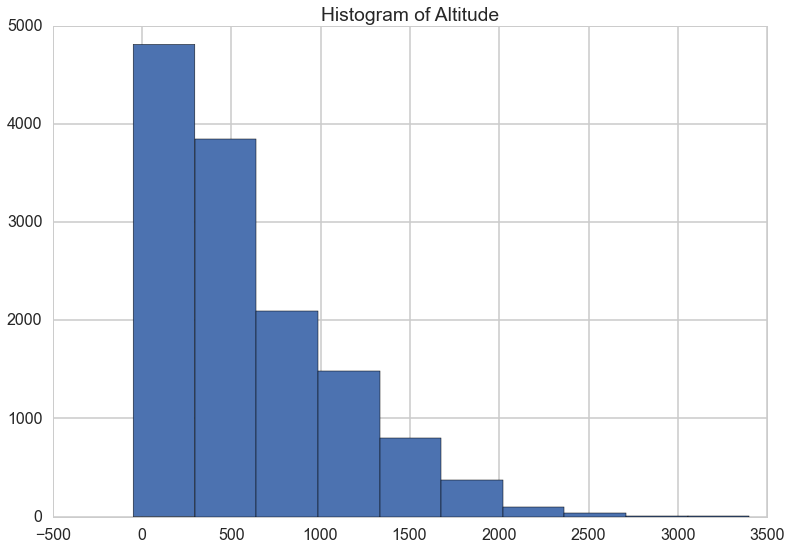

In [11]:
plt.hist(to_int_list(all_info, 'altitude'))
plt.title('Histogram of Altitude');

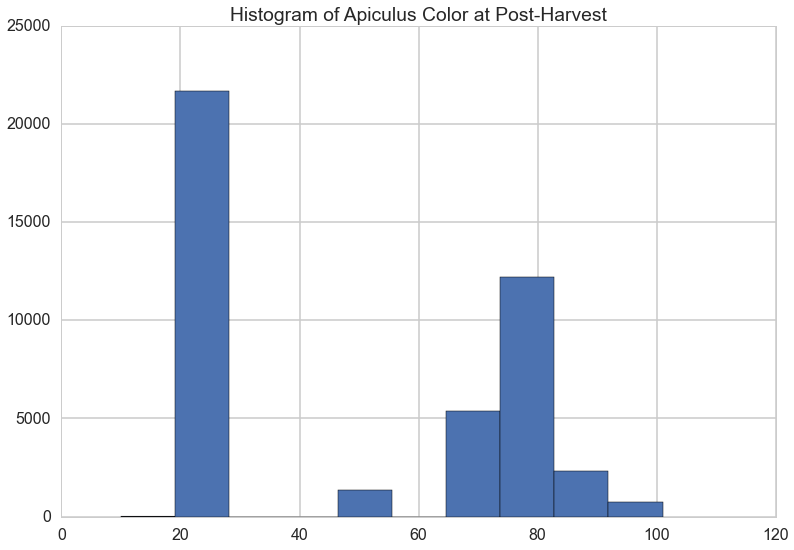

In [12]:
plt.hist(to_int_list(all_info, 'apiculus_color_post_harv'))
plt.title('Histogram of Apiculus Color at Post-Harvest');

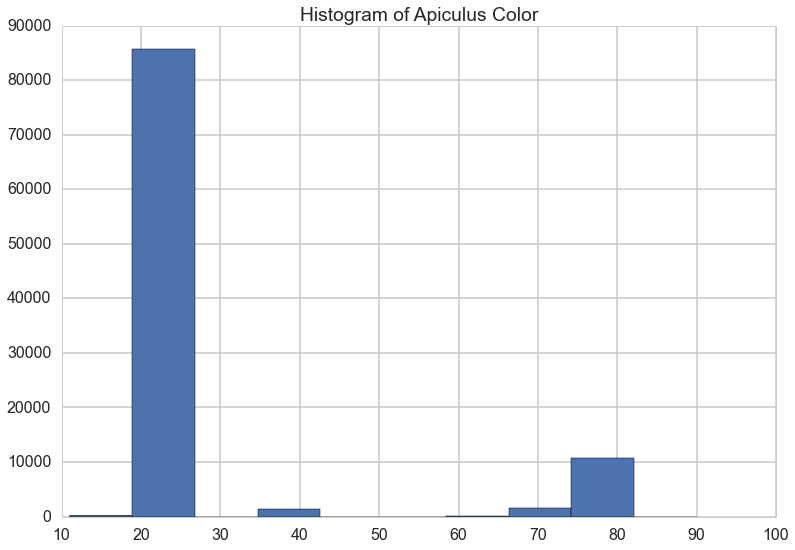

In [13]:
plt.hist(to_int_list(all_info, 'apiculus_color'))
plt.title('Histogram of Apiculus Color');

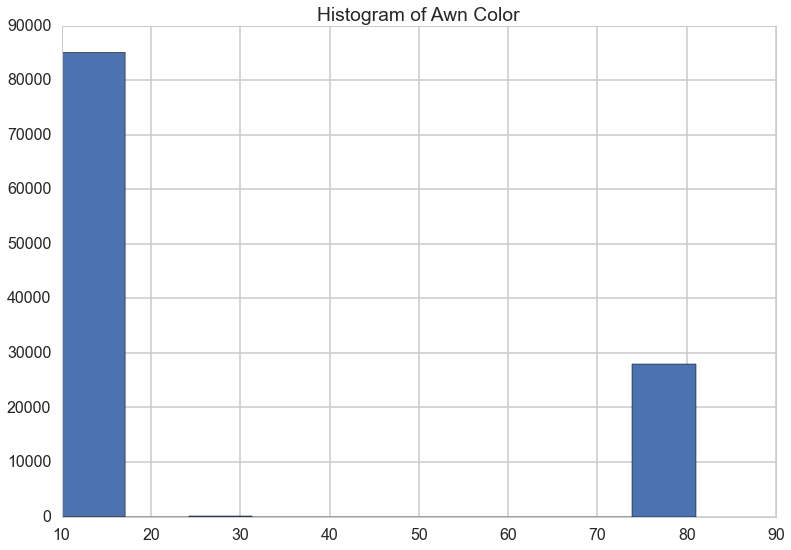

In [14]:
plt.hist(to_int_list(all_info, 'awn_color'))
plt.title('Histogram of Awn Color');

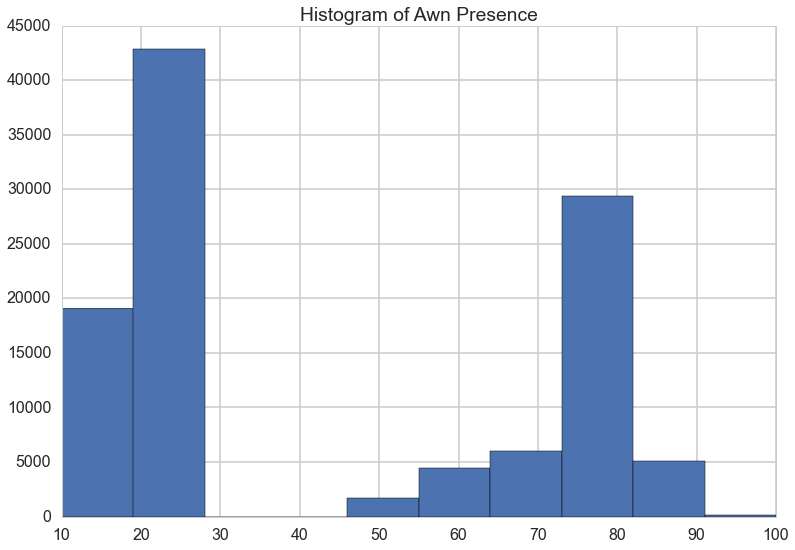

In [15]:
plt.hist(to_int_list(all_info, 'awn_presence'))
plt.title('Histogram of Awn Presence');

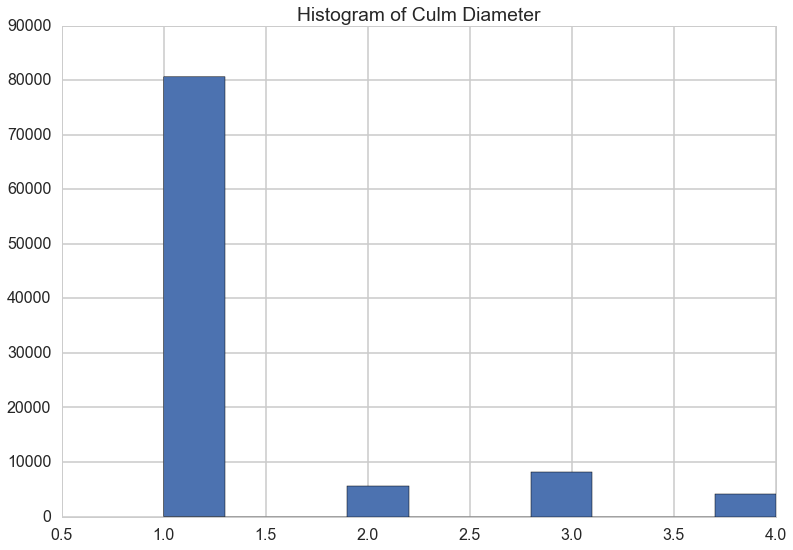

In [77]:
plt.hist(to_int_list(all_info, 'culm_diam'))
plt.title('Histogram of Culm Diameter');

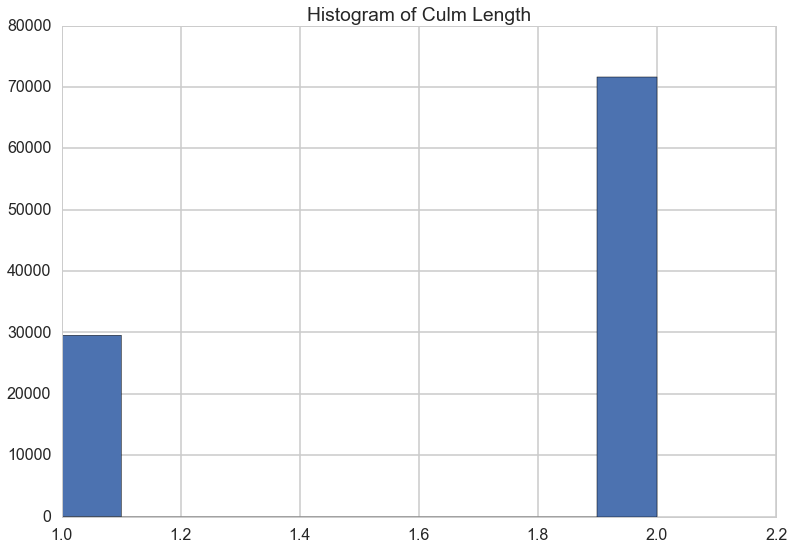

In [158]:
plt.hist(to_int_list(all_info, 'culm_length'))
plt.title('Histogram of Culm Length');

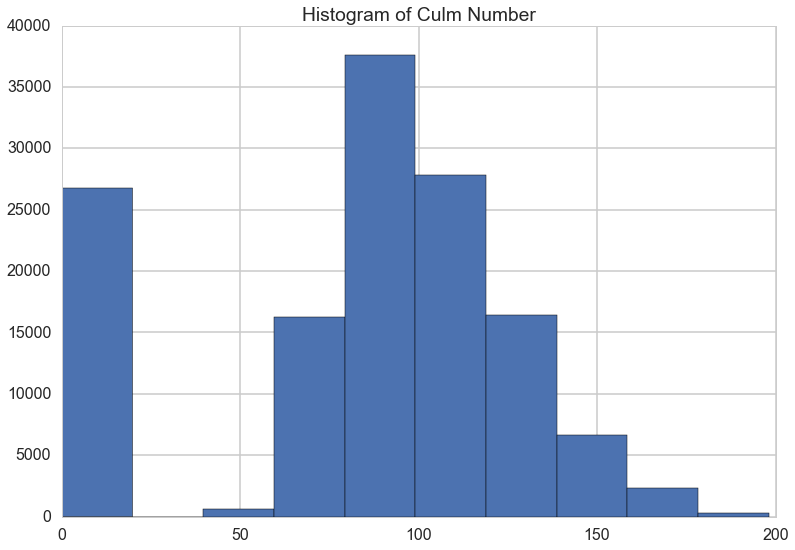

In [159]:
plt.hist(to_int_list(all_info, 'culm_num'))
plt.title('Histogram of Culm Number');

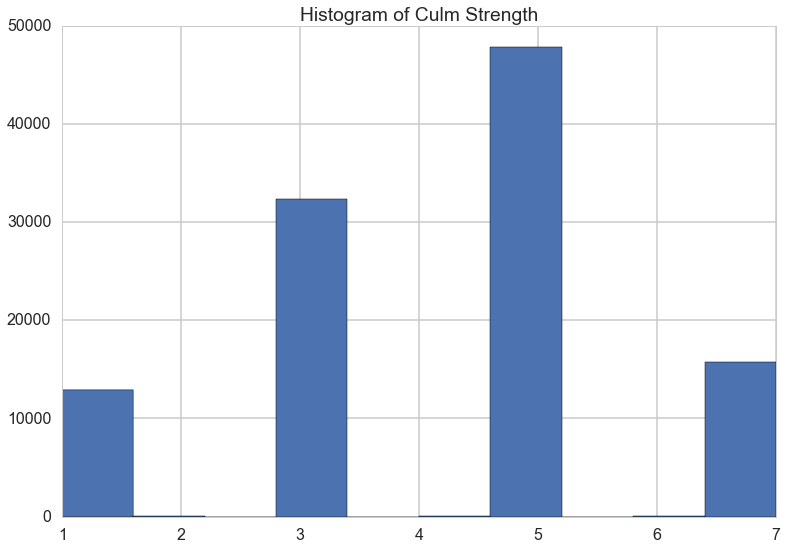

In [177]:
plt.hist(to_int_list(all_info, 'culm_strength'))
plt.title('Histogram of Culm Strength');

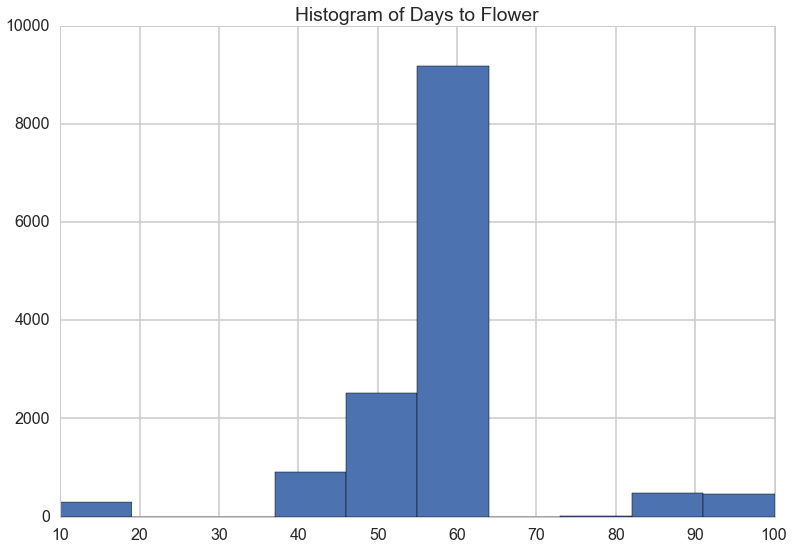

In [178]:
plt.hist(to_int_list(all_info, 'days_to_flower'))
plt.title('Histogram of Days to Flower');

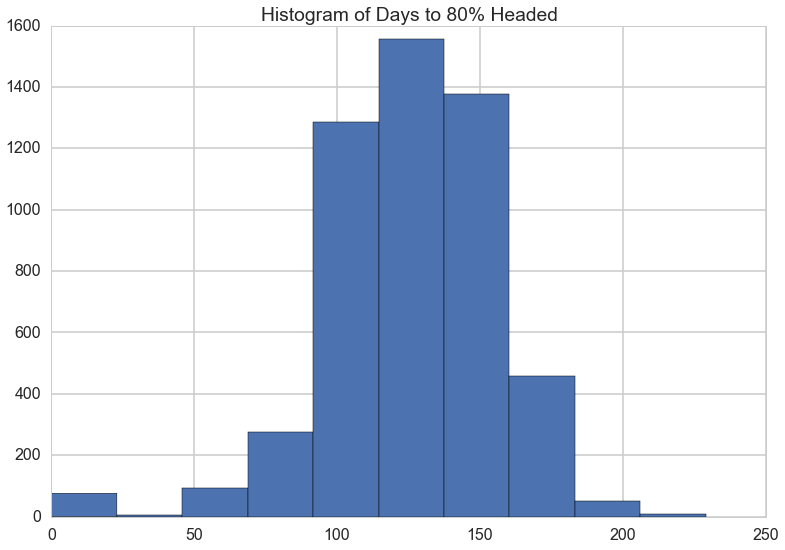

In [180]:
plt.hist(to_int_list(all_info, 'days_to_head'))
plt.title('Histogram of Days to 80% Headed');

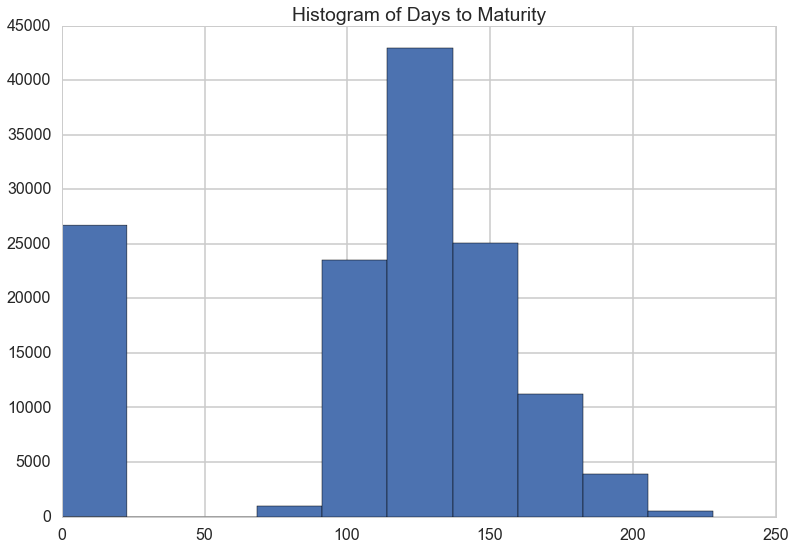

In [182]:
plt.hist(to_int_list(all_info, 'days_to_mat'))
plt.title('Histogram of Days to Maturity');

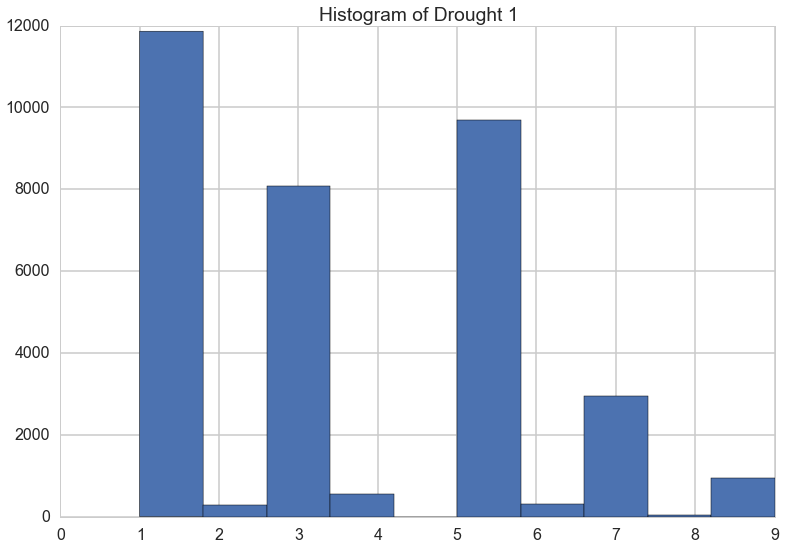

In [184]:
plt.hist(to_int_list(all_info, 'drought_1'))
plt.title('Histogram of Drought 1');

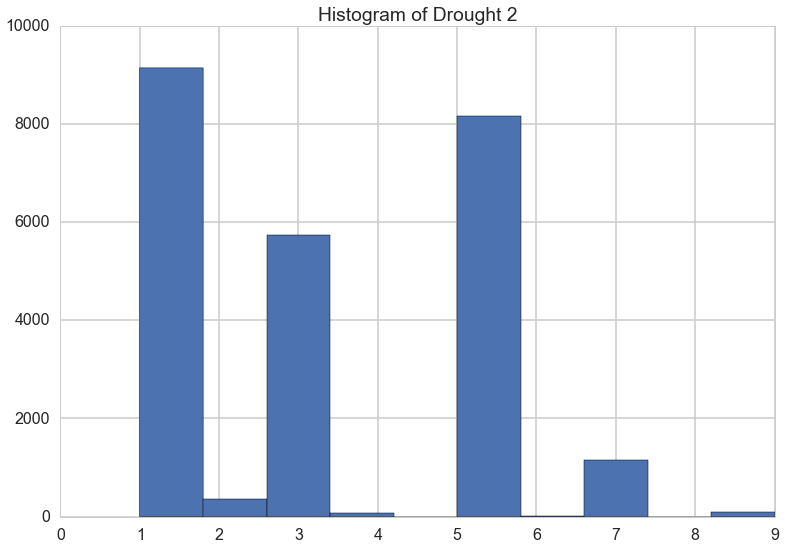

In [185]:
plt.hist(to_int_list(all_info, 'drought_2'))
plt.title('Histogram of Drought 2');

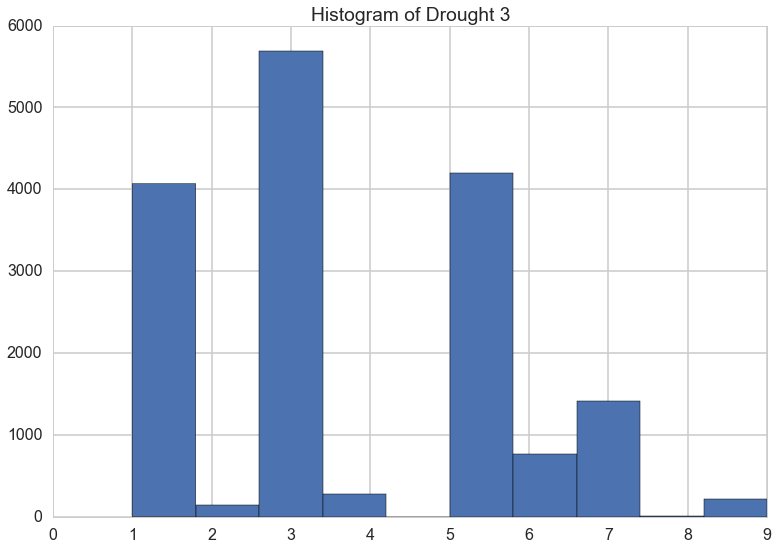

In [186]:
plt.hist(to_int_list(all_info, 'drought_3'))
plt.title('Histogram of Drought 3');

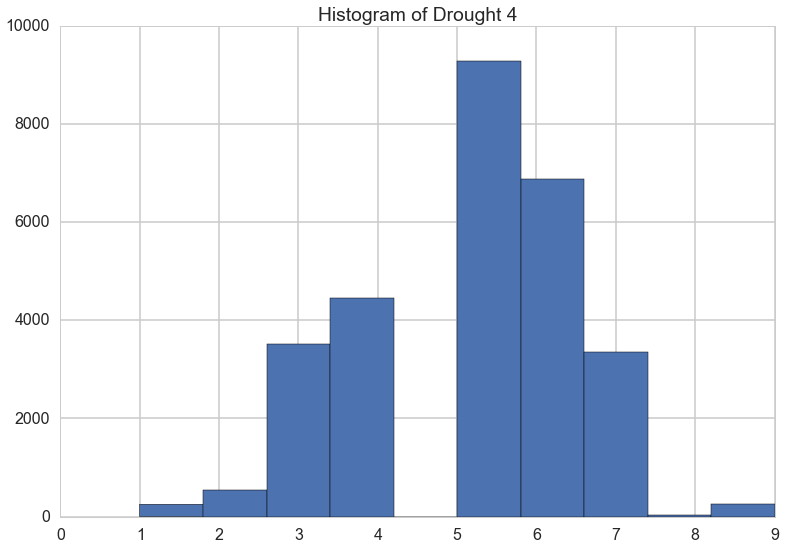

In [187]:
plt.hist(to_int_list(all_info, 'drought_4'))
plt.title('Histogram of Drought 4');

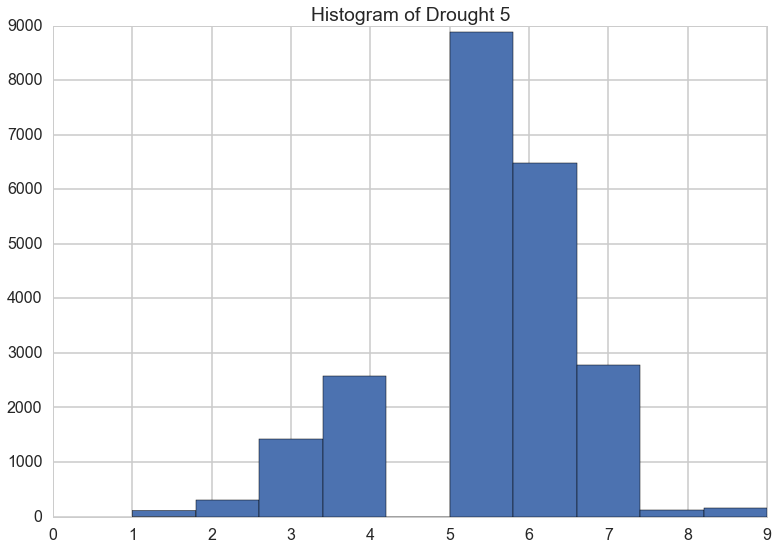

In [188]:
plt.hist(to_int_list(all_info, 'drought_5'))
plt.title('Histogram of Drought 5');

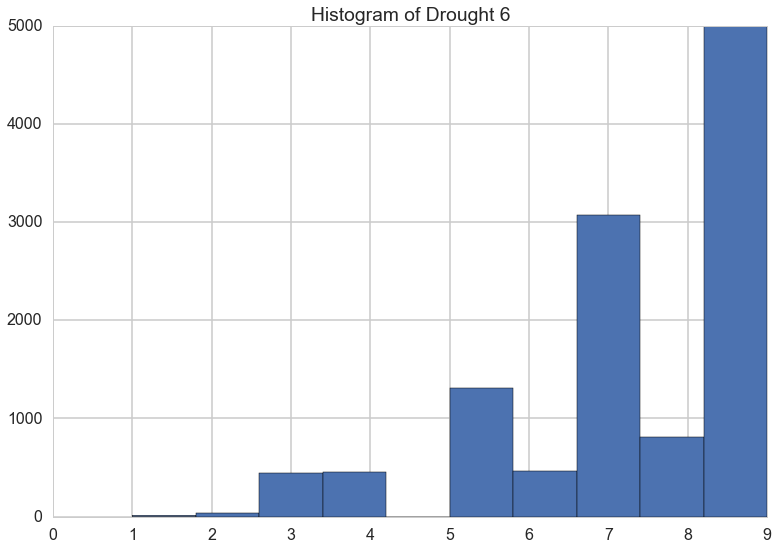

In [189]:
plt.hist(to_int_list(all_info, 'drought_6'))
plt.title('Histogram of Drought 6');

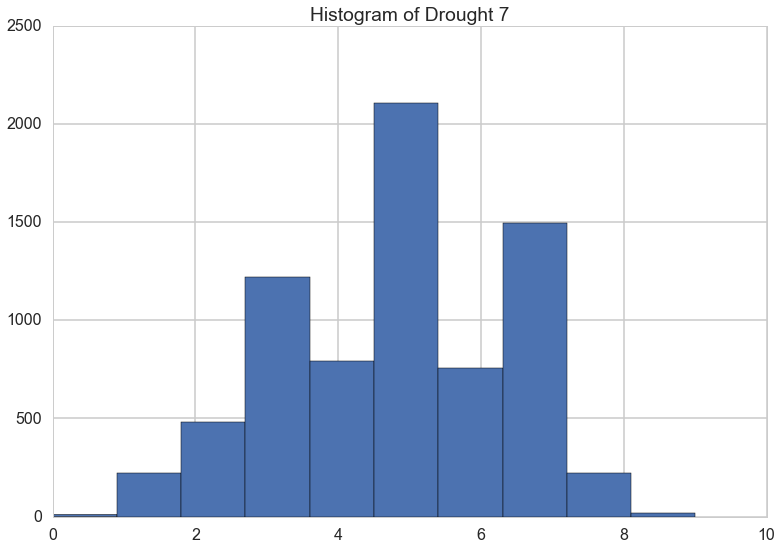

In [190]:
plt.hist(to_int_list(all_info, 'drought_7'))
plt.title('Histogram of Drought 7');

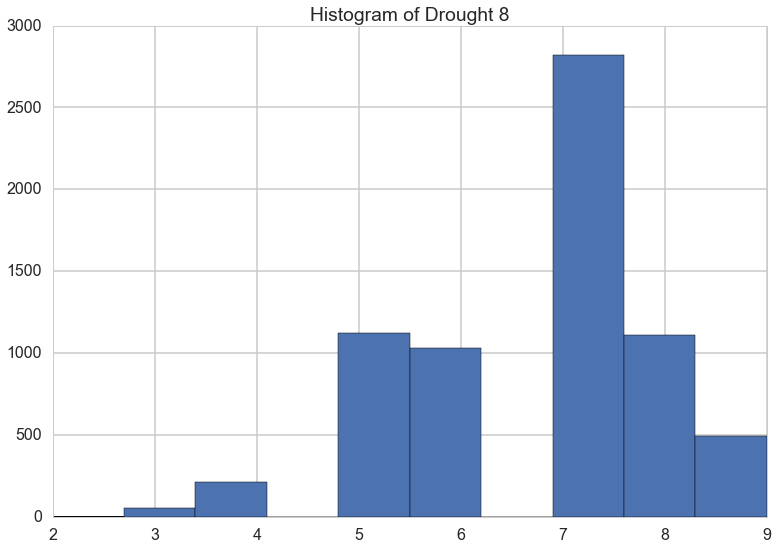

In [191]:
plt.hist(to_int_list(all_info, 'drought_8'))
plt.title('Histogram of Drought 8');

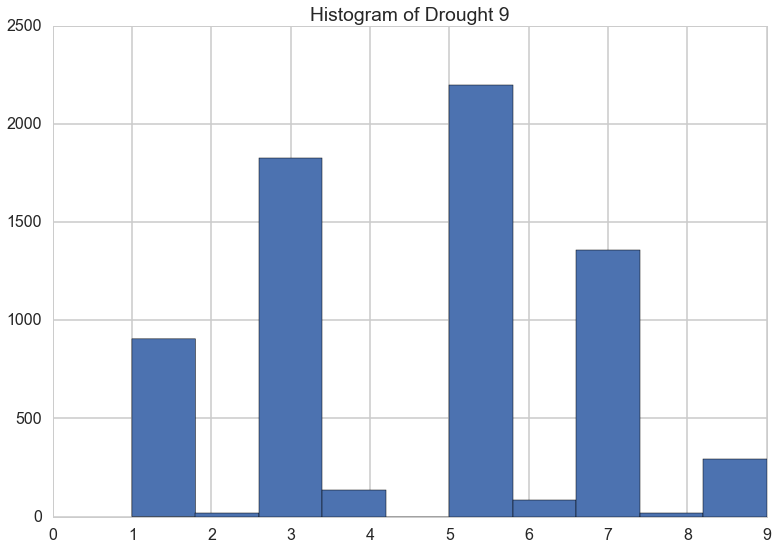

In [192]:
plt.hist(to_int_list(all_info, 'drought_9'))
plt.title('Histogram of Drought 9');

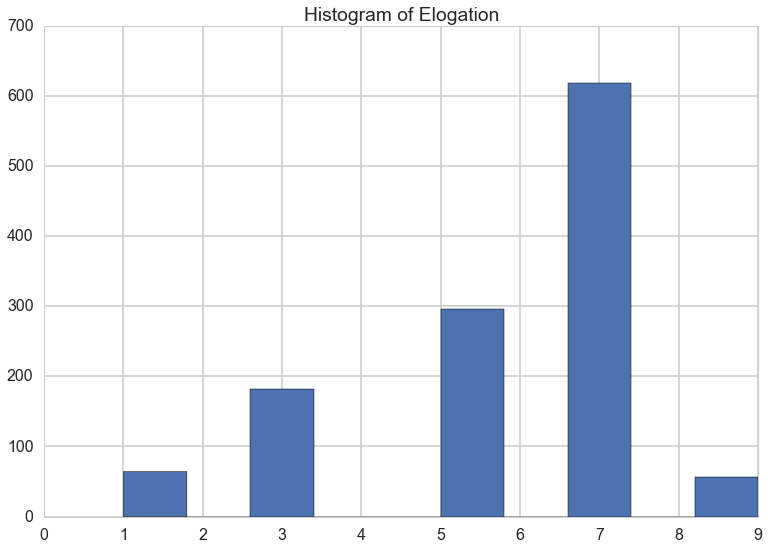

In [194]:
plt.hist(to_int_list(all_info, 'elogation'))
plt.title('Histogram of Elogation');

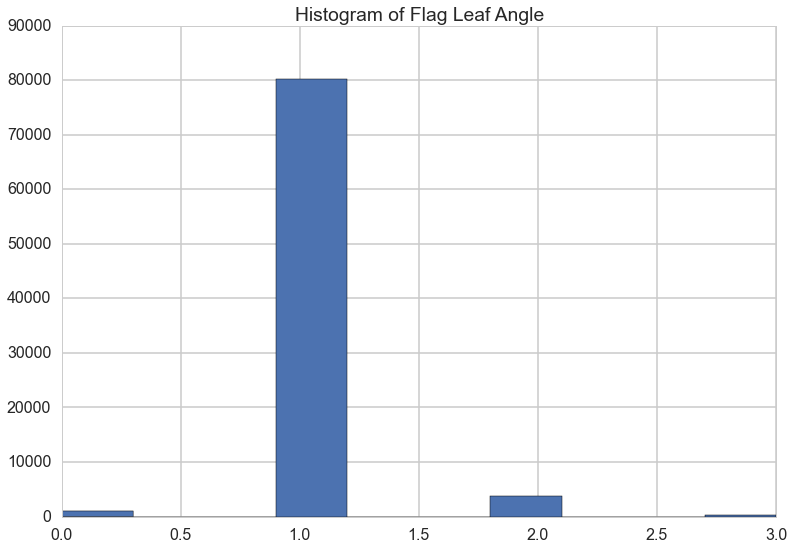

In [195]:
plt.hist(to_int_list(all_info, 'flag_leaf_angle'))
plt.title('Histogram of Flag Leaf Angle');

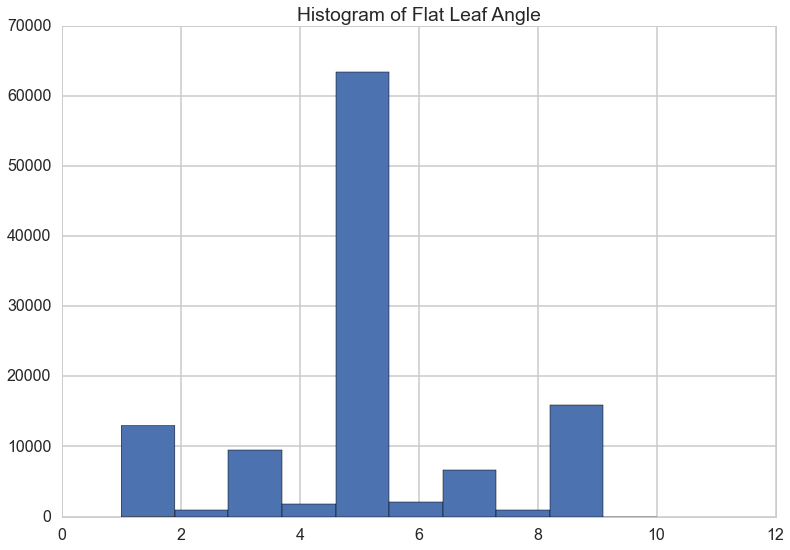

In [196]:
plt.hist(to_int_list(all_info, 'flat_leaf_angle'))
plt.title('Histogram of Flat Leaf Angle');

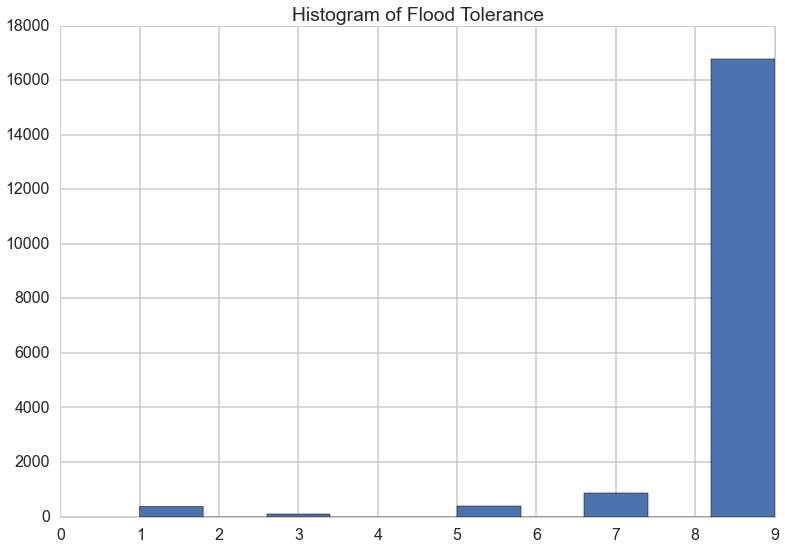

In [197]:
plt.hist(to_int_list(all_info, 'flood_tolerance'))
plt.title('Histogram of Flood Tolerance');

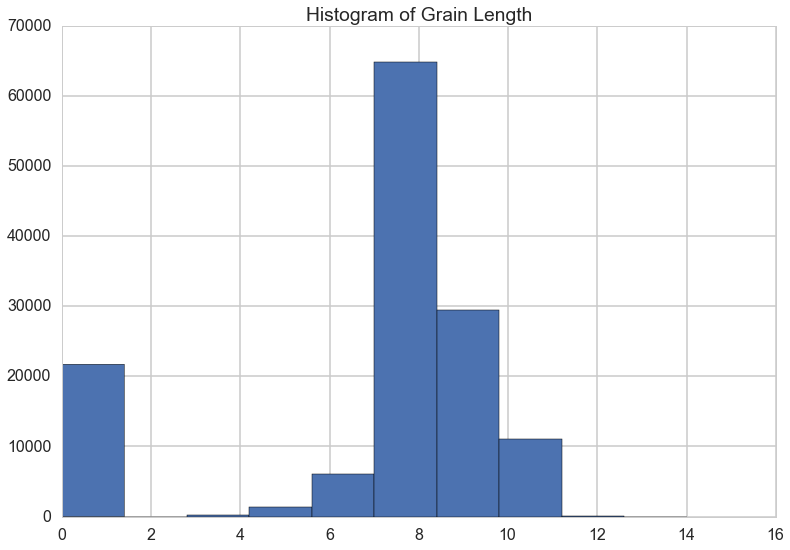

In [198]:
plt.hist(to_int_list(all_info, 'grain_len'))
plt.title('Histogram of Grain Length');

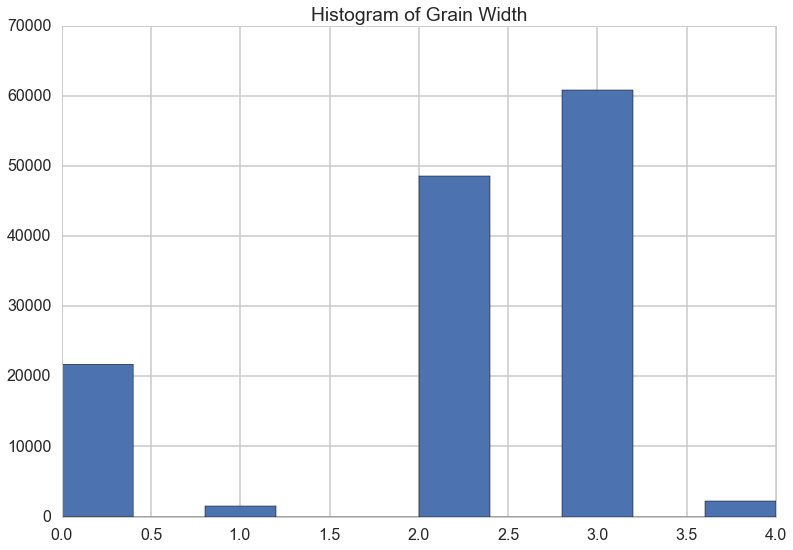

In [199]:
plt.hist(to_int_list(all_info, 'grain_wid'))
plt.title('Histogram of Grain Width');

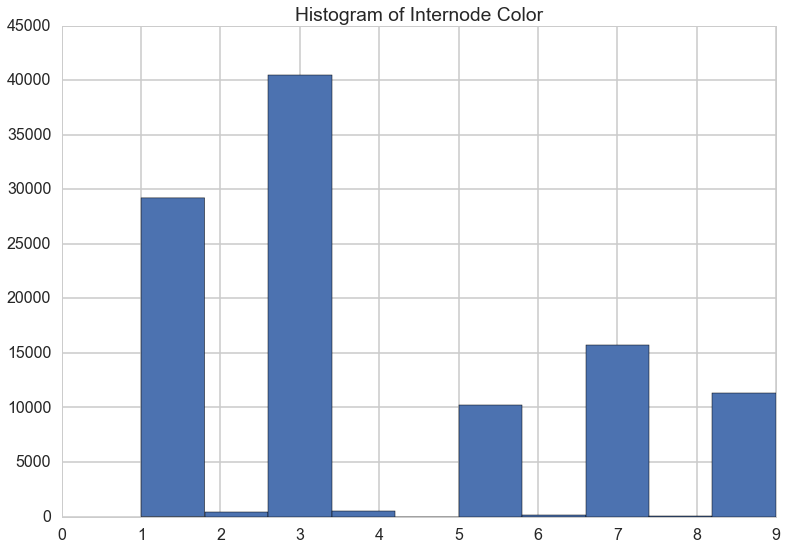

In [202]:
plt.hist(to_int_list(all_info, 'internode_color'))
plt.title('Histogram of Internode Color');

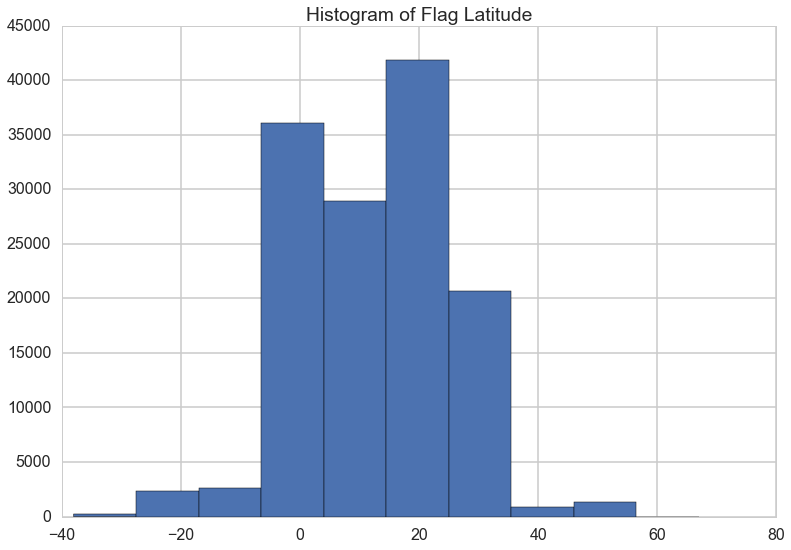

In [203]:
plt.hist(to_int_list(all_info, 'latitude'))
plt.title('Histogram of Flag Latitude');

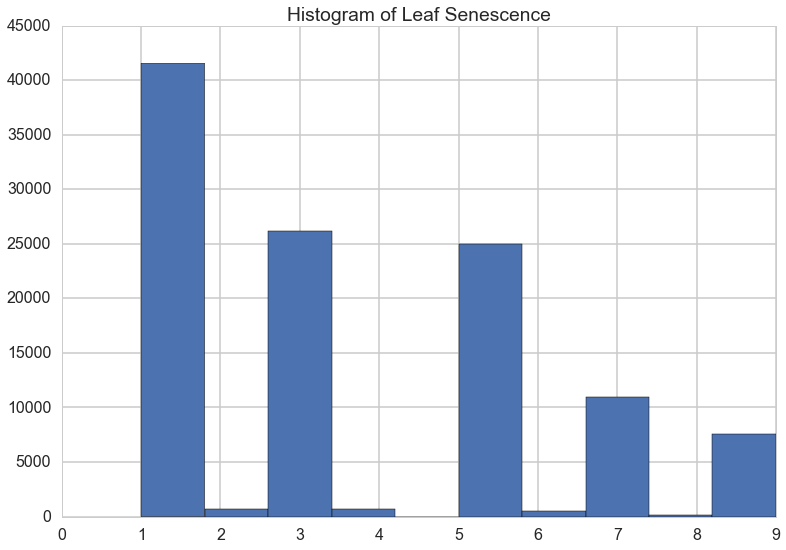

In [204]:
plt.hist(to_int_list(all_info, 'leaf_senescence'))
plt.title('Histogram of Leaf Senescence');

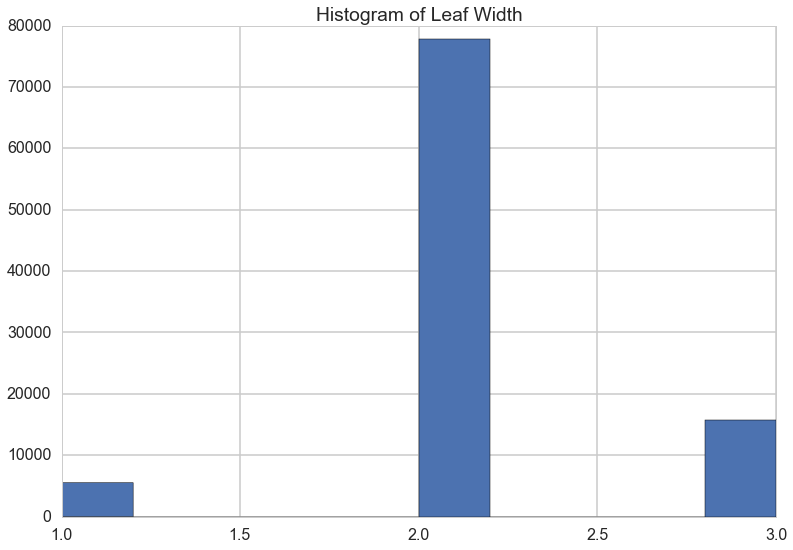

In [205]:
plt.hist(to_int_list(all_info, 'leaf_width'))
plt.title('Histogram of Leaf Width');

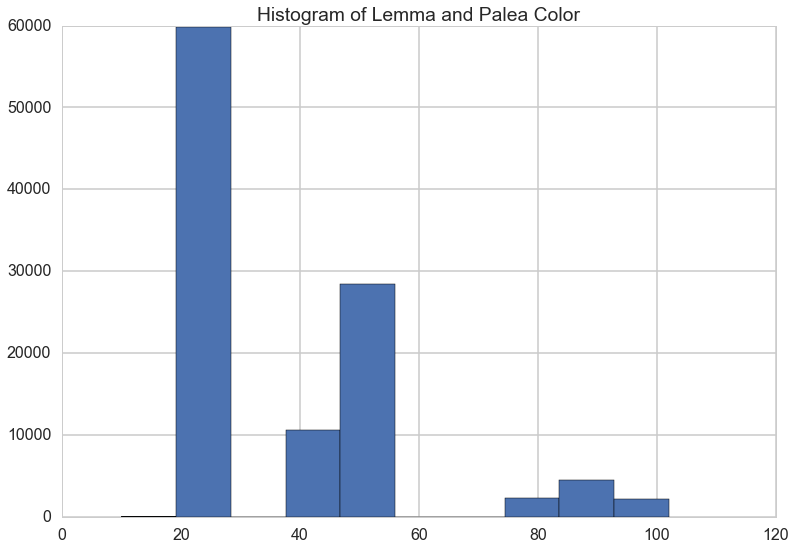

In [206]:
plt.hist(to_int_list(all_info, 'lemma_and_palea_color'))
plt.title('Histogram of Lemma and Palea Color');

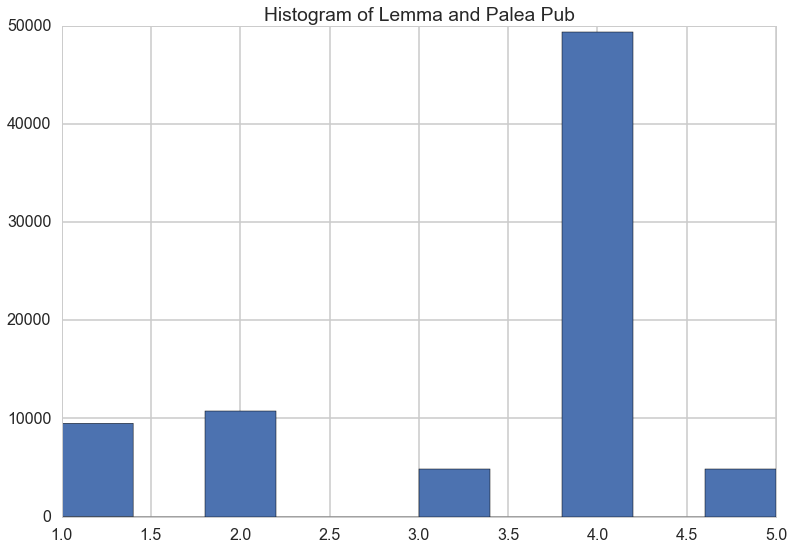

In [207]:
plt.hist(to_int_list(all_info, 'lemma_and_palea_pub'))
plt.title('Histogram of Lemma and Palea Pub');

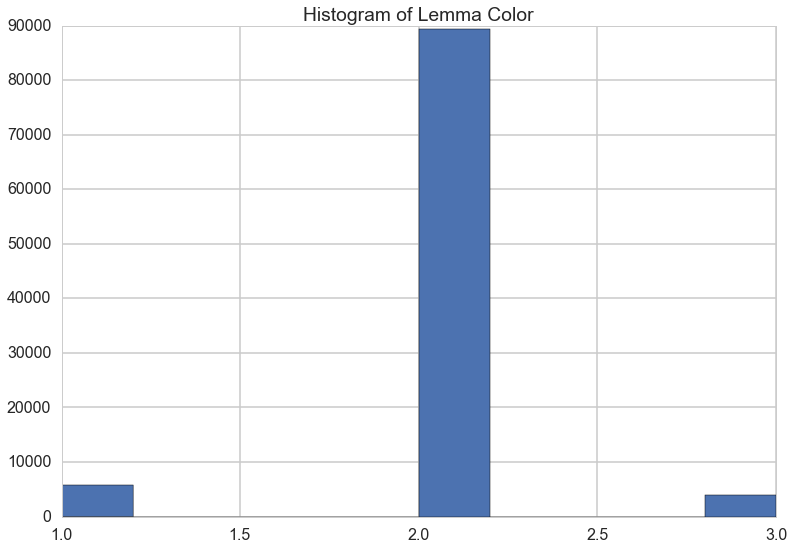

In [208]:
plt.hist(to_int_list(all_info, 'lemma_color'))
plt.title('Histogram of Lemma Color');

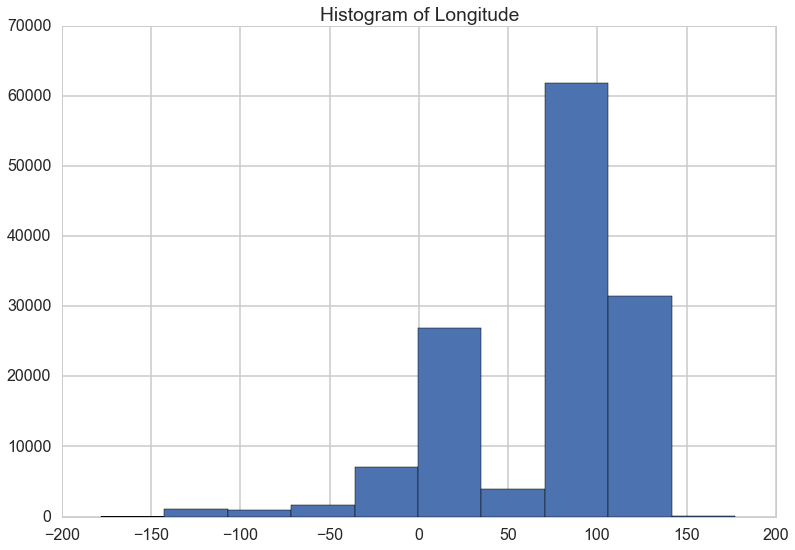

In [209]:
plt.hist(to_int_list(all_info, 'longitude'))
plt.title('Histogram of Longitude');

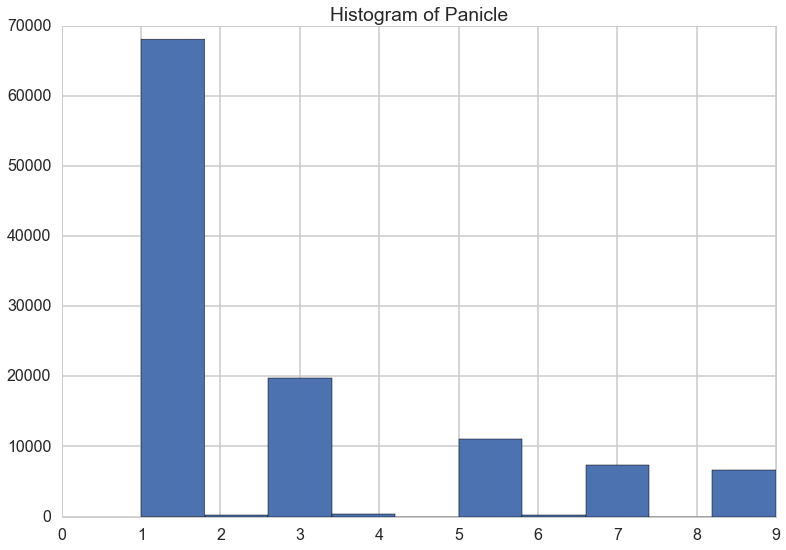

In [210]:
plt.hist(to_int_list(all_info, 'panicle'))
plt.title('Histogram of Panicle');

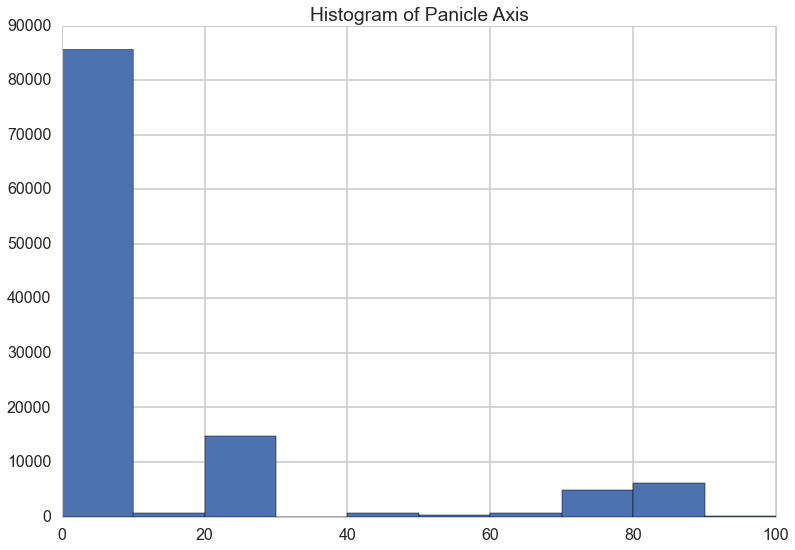

In [211]:
plt.hist(to_int_list(all_info, 'panicle_axis'))
plt.title('Histogram of Panicle Axis');

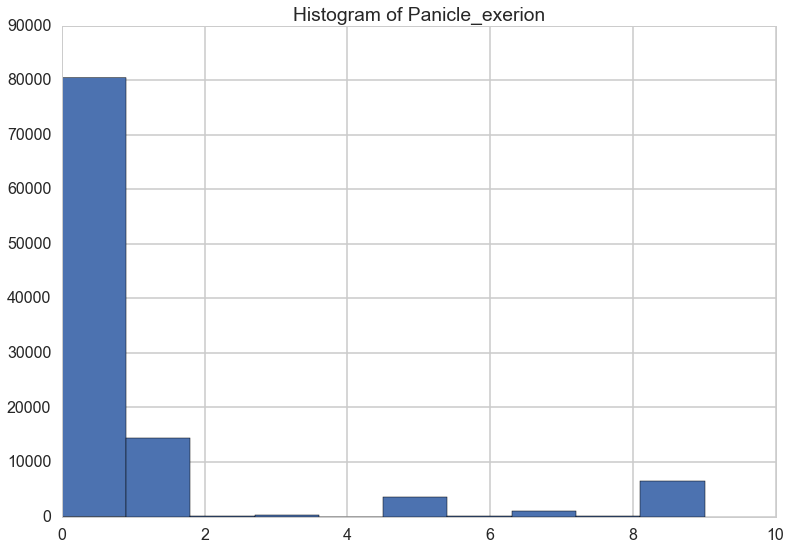

In [212]:
plt.hist(to_int_list(all_info, 'panicle_exerion'))
plt.title('Histogram of Panicle_exerion');

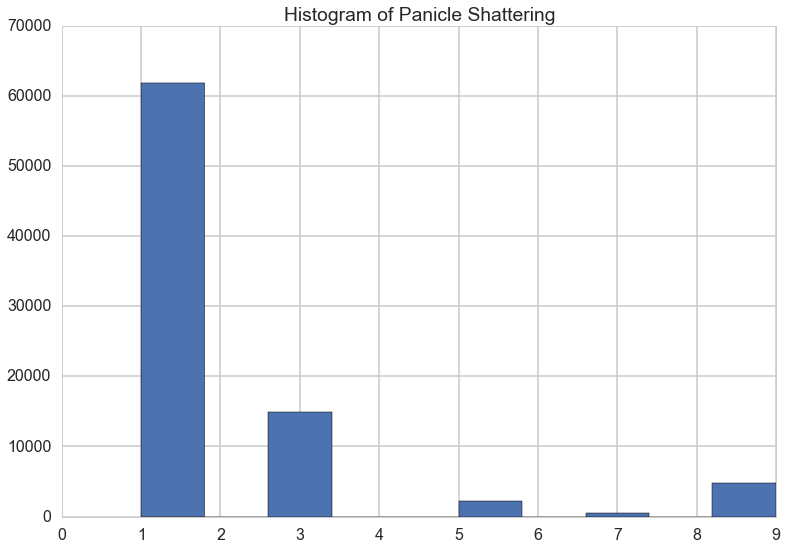

In [213]:
plt.hist(to_int_list(all_info, 'panicle_shattering'))
plt.title('Histogram of Panicle Shattering');

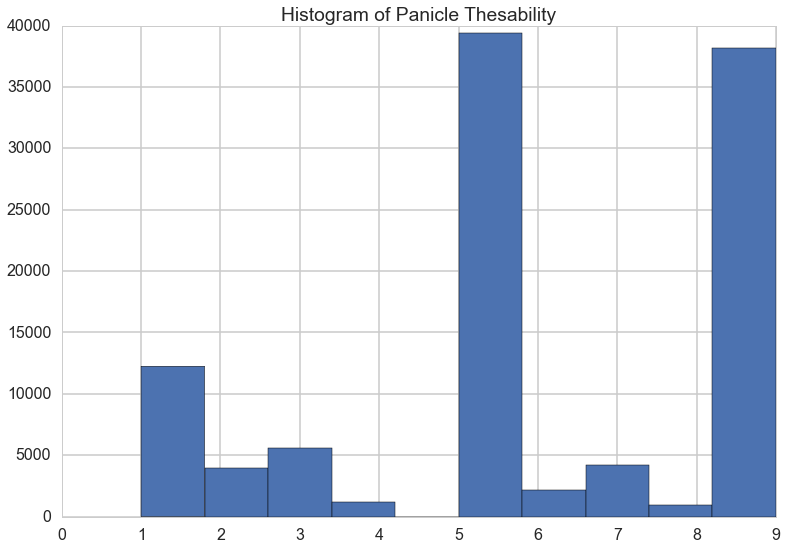

In [214]:
plt.hist(to_int_list(all_info, 'panicle_thesability'))
plt.title('Histogram of Panicle Thesability');

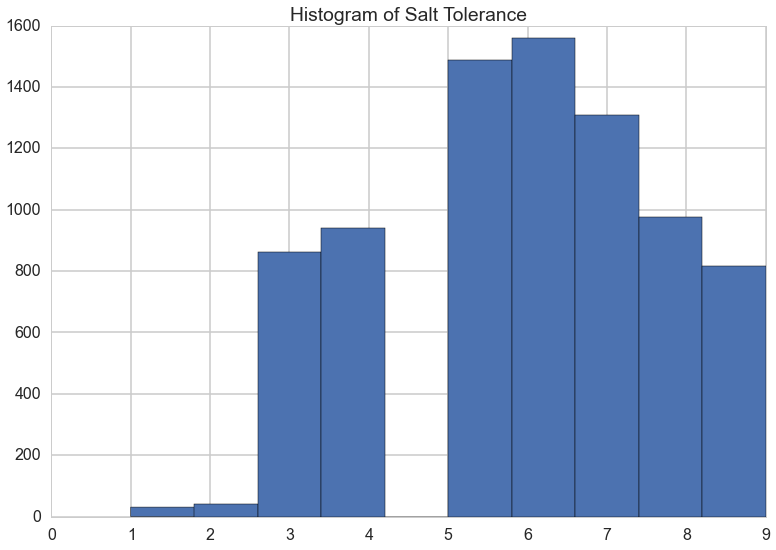

In [215]:
plt.hist(to_int_list(all_info, 'salt_tolerance'))
plt.title('Histogram of Salt Tolerance');

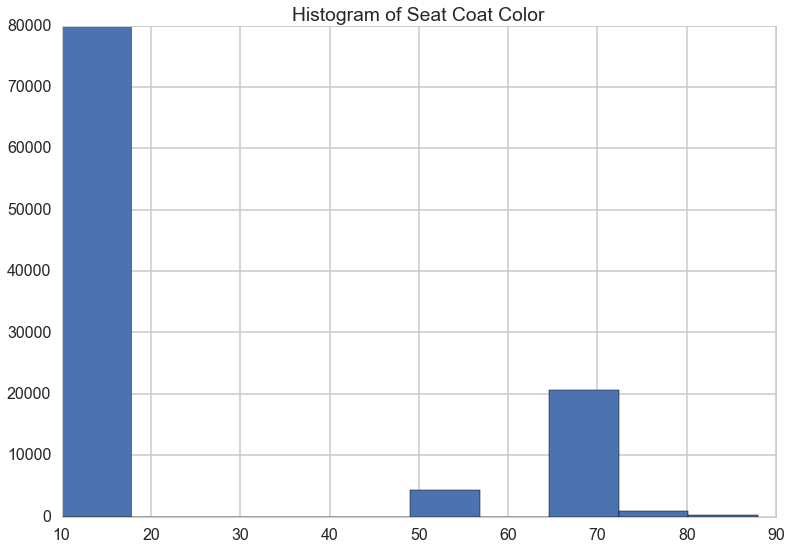

In [216]:
plt.hist(to_int_list(all_info, 'seat_coat_color'))
plt.title('Histogram of Seat Coat Color');

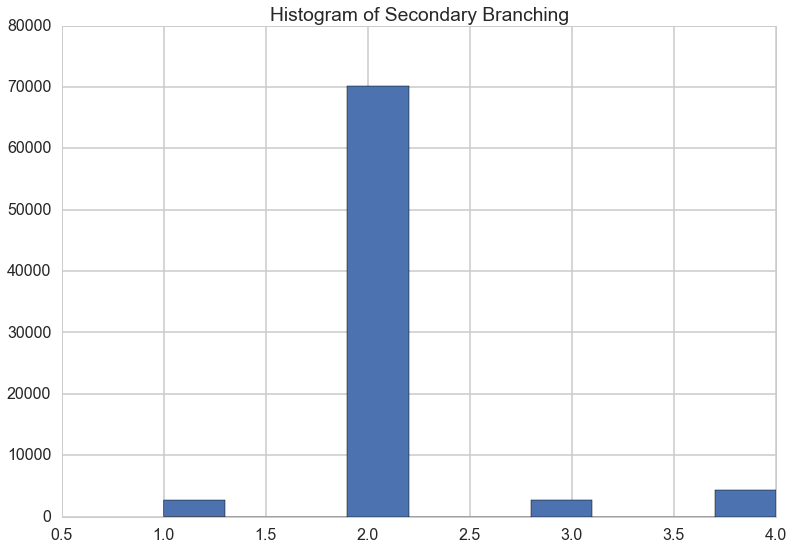

In [217]:
plt.hist(to_int_list(all_info, 'secondary_branching'))
plt.title('Histogram of Secondary Branching');

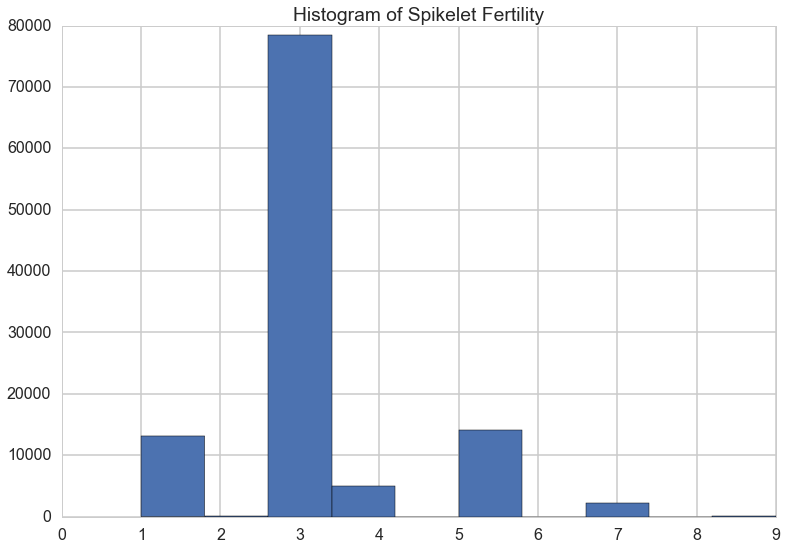

In [219]:
plt.hist(to_int_list(all_info, 'spikelet_fertility'))
plt.title('Histogram of Spikelet Fertility');

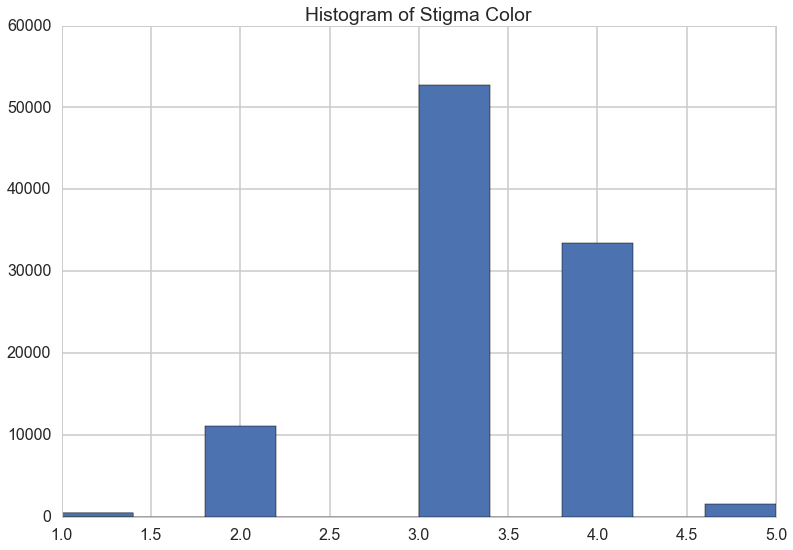

In [220]:
plt.hist(to_int_list(all_info, 'stigma_color'))
plt.title('Histogram of Stigma Color');

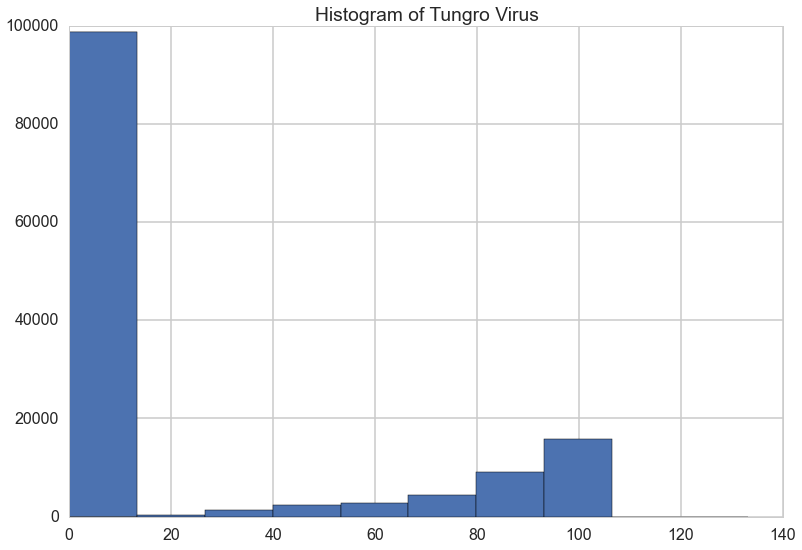

In [221]:
plt.hist(to_int_list(all_info, 'tungro_virus'))
plt.title('Histogram of Tungro Virus');

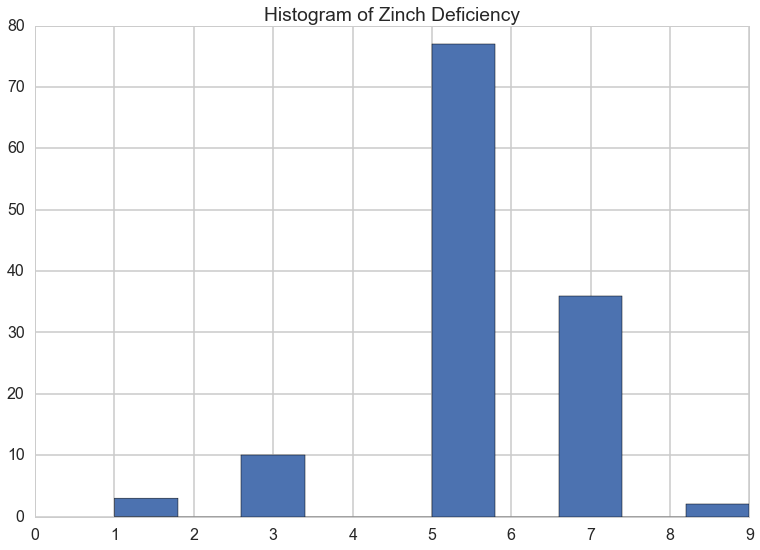

In [222]:
plt.hist(to_int_list(all_info, 'zinc_def_1'))
plt.title('Histogram of Zinch Deficiency');

{1.0, 3.0, 5.0, 7.0, 9.0}

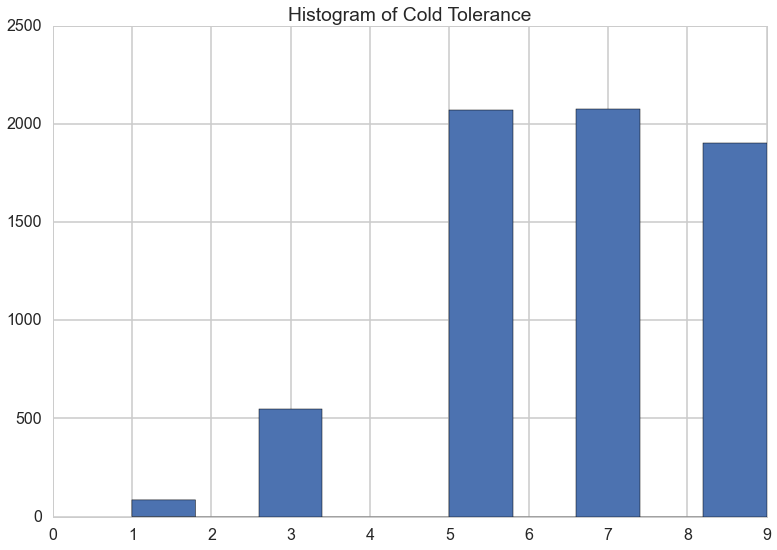

In [18]:
plt.hist(to_int_list(all_info, 'cold_tolerance'))
plt.title('Histogram of Cold Tolerance');
set(to_int_list(all_info, 'cold_tolerance'))

In [19]:
def unique_values(df, column):
    print "%s:" % column
    print np.unique(list(df[column]))
    print ''

In [20]:
unique_values(all_info, 'auricle_color')
unique_values(all_info, 'bacterial_blight')
unique_values(all_info, 'basal_color')
unique_values(all_info, 'blade_color')
unique_values(all_info, 'blade_pub')
unique_values(all_info, 'blast')
unique_values(all_info, 'blade_pub')
unique_values(all_info, 'collar_color')
unique_values(all_info, 'culm_angle')
#unique_values(all_info, 'district')
#unique_values(all_info, 'donor_country')
unique_values(all_info, 'endosperm_type')
unique_values(all_info, 'fao_in_trust')
unique_values(all_info, 'leaf_angle')
unique_values(all_info, 'leaf_length')
unique_values(all_info, 'leaf_texture')
unique_values(all_info, 'lemma_color_at_anthesis')
unique_values(all_info, 'ligule_color')
unique_values(all_info, 'ligule_shape')
unique_values(all_info, 'lingule_pub')
unique_values(all_info, 'multilateral_system')
unique_values(all_info, 'node_color')
#unique_values(all_info, 'province')
unique_values(all_info, 'seedling_height')
unique_values(all_info, 'sheath_blight')
#unique_values(all_info, 'source_country')
unique_values(all_info, 'special_traits')
unique_values(all_info, 'species_name')
unique_values(all_info, 'status')
unique_values(all_info, 'subpopulation')
#unique_values(all_info, 'town')
unique_values(all_info, 'varietal_group')
unique_values(all_info, 'variety_group_from_morph')
#unique_values(all_info, 'village')

auricle_color:
['Absent' 'Green' 'Light green' 'Mixture' 'Purple' 'Purple shade'
 'Yellowish green' 'nan']

bacterial_blight:
['Highly susceptible' 'Moderately resistant' 'Moderately susceptible'
 'Resistant' 'Susceptible' 'nan']

basal_color:
['Green' 'Light purple' 'Mixture' 'Purple' 'Purple lines' 'nan']

blade_color:
['Dark green' 'Green' 'Light green' 'Mixture' 'Purple' 'Purple blotch'
 'Purple margin' 'Purple tips' 'nan']

blade_pub:
['Glabrous' 'Intermediate' 'Mixture' 'Pubescent' 'nan']

blast:
['Moderately resistant' 'Resistant' 'Susceptible' 'nan']

blade_pub:
['Glabrous' 'Intermediate' 'Mixture' 'Pubescent' 'nan']

collar_color:
['Absent(collarless)' 'Green' 'Light green' 'Mixture' 'Purple' 'nan']

culm_angle:
['Erect (1)' 'Erect (2)' 'Intermediate (3)' 'Intermediate (4)' 'Mixture'
 'Open (5)' 'Open (6)' 'Procumbent' 'Spreading (7)' 'Spreading (8)' 'nan']

endosperm_type:
['Glutinous(waxy)' 'Intermediate' 'Mixture' 'Non-glutinous(non-waxy)' 'nan']

fao_in_trust:
['Yes' 'nan'

In [21]:
array=[]
for r in index_df.index:
    if isinstance(index_df.ix[r]["DNA_Accno_source"], str):
        array.append(int(index_df.ix[r]["DNA_Accno_source"][5:]))
    else:
        array.append(np.nan)
index_df.insert(5, "IRGC_Number", array);

NameError: name 'index_df' is not defined

In [22]:
index_df.head()

NameError: name 'index_df' is not defined

In [7]:
all_info = pd.read_csv('all_info_combined.csv', index_col=0)

In [23]:
all_info.head()

Unnamed: 0    acc_date acc_id_seed_donor_number  acc_id_seq_num alkali_tolerance  altitude apiculus_color apiculus_color_post_harv auricle_color awn_color awn_presence bacterial_blight basal_color blade_color  blade_pub blast cold_tolerance collar_color         collection_number     culm_angle culm_diam culm_length  culm_num culm_strength cultural_type days_to_flower  days_to_head  days_to_mat  days_to_maturity district donor_country drought_1 drought_2 drought_3 drought_4 drought_5  \
0       83768   9/22/1994                  8800314               2                X      1500            020                      080        Purple       080          080              NaN      Purple       Green  Pubescent   NaN              X       Purple                       NaN       Open (5)         1           2        83             5           NaN              X           NaN          113               113      NaN         JAPAN         X         X         X         X         X   
1       83794  12/26/1988               G.S. 18252               1                X       140              X                        X           NaN       080            X              NaN       Green       Green  Pubescent   NaN              X          NaN  086/88/TNE34; SRN-88-502  Spreading (7)         X           X         0             X           NaN            062           141            0                 0  Tha Tum      THAILAND         X         X         X         X         X   
2       83764   9/22/1994                 00080232               2                X      1000            020                      020   Light green       010          020              NaN       Green       Green  Pubescent   NaN              X  Light green                       NaN  Spreading (7)         1           2       108             7           NaN              X           NaN          138               138      NaN         JAPAN         X         X         X         X         X   
3       83764   9/22/1994                 00080232               2                X      1000            020                      020   Light green       010          020              NaN       Green       Green  Pubescent   NaN              X  Light green                       NaN  Spreading (7)         1           2       108             7           NaN              X           NaN          138               138      NaN         JAPAN         X         X         X         X         X   
4       83765   9/22/1994                 00080249               2                X      1400            020                      080   Light green       010          020              NaN       Green       Green  Pubescent   NaN              X  Light green                       NaN       Open (5)         1           2        90             5           NaN              X           NaN          120               120      NaN         JAPAN         X         X         X         X         X   

  drought_6 drought_7 drought_8 drought_9 elogation endosperm_color           endosperm_type fao_in_trust flag_leaf_angle flat_leaf_angle flood_tolerance  grain_len  grain_wid internode_color  latitude   leaf_angle leaf_length leaf_senescence leaf_texture leaf_width lemma_and_palea_color lemma_and_palea_pub lemma_color                      lemma_color_at_anthesis ligule_color ligule_shape lingule_pub  longitude multilateral_system node_color panicle panicle_axis panicle_exerion  \
0         X         X         X         X         X           White  Non-glutinous(non-waxy)          Yes               1               9               X          7          2               3         0  Drooping(9)  131-150 cm               5          NaN          3                   053                   4           2       Moderately strong(most plants leaning)      Whitish      2-Cleft  Light gold          0                 Yes     Purple       1          080               1   
1         X         X         X         X         X             Re

In [24]:
merged_df_updated=pd.merge(left=index_df,right=all_info, left_on='IRGC_Number', right_index=True)
print "Shape: " + str(merged_df_updated.shape);

NameError: name 'index_df' is not defined

In [13]:
merged_df_updated.head()

Entry_No Source   DNA_UNIQUE_ID               DNA_Designation DNA_Accno_source  IRGC_Number DNA_VARNAME_source DNA_Othername_source  ORI_COUNTRY   Unnamed: 8 Genetic_Stock_Accno Genetic_stock_Designation(varname)  total seq count  passed qc seq count depth Variety Group (Tree)1   acc_date acc_id_seed_donor_number  acc_id_seq_num alkali_tolerance  altitude apiculus_color apiculus_color_post_harv auricle_color awn_color awn_presence bacterial_blight basal_color blade_color  blade_pub  \
0        65   IRRI   IRIS 313-9783  BERENJ 1277 S::IRGC 3461-1-1        IRGC 3461         3461      BERENJ 1277 S                  NaN  AFGHANISTAN  Afghanistan         IRGC 121902         BERENJ 1277 S::IRGC 3461-1              NaN                  NaN   NaN              Japonica        NaN                PI 223894               1                X       NaN              X                        X   Light green       010          070              NaN       Green       Green  Pubescent   
1      1632   IRRI  IRIS 313-10509       AMBARIKORI::IRGC 5132-1        IRGC 5132         5132         AMBARIKORI                  NaN       AFRICA       Africa         IRGC 127120            AMBARIKORI::IRGC 5132-1              NaN                  NaN   NaN                Indica   4/7/1962                      NaN             NaN                X       NaN              X                        X   Light green       010          010      Susceptible       Green       Green  Pubescent   
3       363   IRRI   IRIS 313-9778          GENIT::IRGC 3272-1-1        IRGC 3272         3272              GENIT                  NaN    ARGENTINA    Argentina         IRGC 125751                 GENIT::IRGC 3272-1         66457214             60982350  12.7                Indica        NaN                PI 238490               1                X       NaN              X                        X   Light green       010          010              NaN       Green       Green  Pubescent   
8       659   IRRI   IRIS 313-9980  FORTUNA INIA::IRGC 55865-1-1       IRGC 55865        55865       FORTUNA INIA                  NaN    ARGENTINA    Argentina         IRGC 125741         FORTUNA INIA::IRGC 55865-1         58030858             58030858  12.0              Japonica   1/2/1980                      NaN             NaN                X       NaN            020                        X   Light green       010          020              NaN       Green  Dark green  Pubescent   
12      365   IRRI   IRIS 313-9795          HD 10::IRGC 6638-1-1        IRGC 6638         6638               HD10                  NaN    AUSTRALIA    Australia         IRGC 125759                 HD 10::IRGC 6638-1         56277286             56277286  11.7                Indica  7/30/1962                      NaN             NaN                X       NaN              X                        X   Light green       010          010      Susceptible       Green       Green  Pubescent   

                   blast cold_tolerance collar_color collection_number        culm_angle culm_diam culm_length  culm_num culm_strength cultural_type days_to_flower  days_to_head  days_to_mat  days_to_maturity district  donor_country drought_1 drought_2 drought_3 drought_4    ...     flat_leaf_angle flood_tolerance grain_len grain_wid internode_color latitude       leaf_angle leaf_length leaf_senescence leaf_texture leaf_width lemma_and_palea_color  lemma_and_palea_pub  lemma_color  \
0            Susceptible              X        Green               NaN         Erect (1)         1           1        80             1           NaN              X           NaN          110               110      NaN  UNITED STATES         5         3         X         5    ...                   9               X         9         2               7       33              NaN    71-90 cm               9          NaN          2                   020                    X            1   
1              Resistant              X        Green              

In [14]:
merged_df_updated.to_csv("merged_dataframe_updated.csv")

In [ ]:
#downloaded PED and MAP files from AWS
#converted PED and MAP files to VCF using plink 1.9 command: ./plink --file ../NB-core_v4 --recode vcf
#downloaded PyVCF from https://pyvcf.readthedocs.org/en/latest/

In [29]:
import vcf

ImportError: No module named vcf

In [186]:
vcf_reader=vcf.Reader(open('../plink.vcf', 'r'))

In [8]:
print vcf_reader.samples

3023


In [183]:
%%time
from collections import defaultdict
i = 0
#class vcf.filters.SnpOnly(args)
#vcf2 = (vcf_reader.filters.fromkeys('sample',['B001_B001']))
snps = defaultdict(list)
for snp in vcf_reader:
#     print snp.CHROM
#     print snp.POS
    loc=(str(snp.CHROM)+'_'+str(snp.POS))
    print loc
    #print snp.REF
    #print snp.ALT[0]
    i = i+1
    for sample in (snp.samples):
        #if sample.is_variant:
        snps[sample.sample].append((snp.POS, sample.data.GT))
    if i == 5:
         break

12_4934864
12_4934865
12_4934879
12_4934880
12_4934907
CPU times: user 67.2 ms, sys: 6.49 ms, total: 73.7 ms
Wall time: 69.2 ms


In [137]:
print snps

defaultdict(<type 'list'>, {'IRIS_313-8412_IRIS_313-8412': [(14884560, '0/0'), (14884688, '0/0'), (14884728, '0/0'), (14884730, '0/0'), (14884769, '0/0')], 'IRIS_313-11579_IRIS_313-11579': [(14884560, None), (14884688, '0/0'), (14884728, '0/0'), (14884730, '0/0'), (14884769, '0/1')], 'IRIS_313-8195_IRIS_313-8195': [(14884560, '0/0'), (14884688, '0/0'), (14884728, '0/0'), (14884730, '0/0'), (14884769, '0/0')], 'B263_B263': [(14884560, '0/0'), (14884688, '0/0'), (14884728, '0/0'), (14884730, '0/0'), (14884769, '0/0')], 'CX151_CX151': [(14884560, '0/0'), (14884688, '0/0'), (14884728, '0/0'), (14884730, '0/0'), (14884769, '0/0')], 'IRIS_313-10992_IRIS_313-10992': [(14884560, '0/0'), (14884688, '0/0'), (14884728, '0/0'), (14884730, '0/0'), (14884769, '0/0')], 'IRIS_313-8739_IRIS_313-8739': [(14884560, '0/1'), (14884688, '0/0'), (14884728, '0/0'), (14884730, '0/0'), (14884769, '0/0')], 'CX59_CX59': [(14884560, '0/0'), (14884688, '0/0'), (14884728, '0/0'), (14884730, '0/0'), (14884769, '0/0')

In [187]:
%%time
from collections import defaultdict
i = 0
snpdf=pd.DataFrame(columns=vcf_reader.samples)
#class vcf.filters.SnpOnly(args)
#vcf2 = (vcf_reader.filters.fromkeys('sample',['B001_B001']))
snps = defaultdict(list)
ind_array=[]
for snp in vcf_reader:
    loc=(str(snp.CHROM)+'_'+str(snp.POS))
    ind_array.append(loc)
    #print snp.POS
    #print snp.REF
    #print snp.ALT[0]
    i = i+1
    for sample in (snp.samples):
        #if sample.is_variant:
        snps[sample.sample].append(sample.data.GT)
    if (i % 1000) == 0:
        df=pd.DataFrame.from_dict(snps)
        df['index']=ind_array
        df=df.set_index('index')
        df.index.name = None
        snpdf=snpdf.append(df)
        snps={}
        snps = defaultdict(list)
        ind_array=[]
        print i
    if (i%50000)==0:
        name=('snps'+str(i/50000)+'.csv')
        snpdf.to_csv(name)
        snpdf=pd.DataFrame(columns=vcf_reader.samples)
        print 'created csv'
snpdf.to_csv('snps_final.csv')

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
created csv
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
created csv
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
created csv
151000
152000
153000
1

In [70]:
snpdf = pd.read_csv('SNP_Data/snps1.csv')
snpdf.head(2)
snpdf.shape

(50000, 3024)

In [71]:
snpdf = snpdf.rename(columns = {'Unnamed: 0':'SNP_Num'})
SNP_Num = snpdf['SNP_Num']

In [4]:
snpdf.head(3)

SNP_Num B001_B001 B002_B002 B003_B003 B004_B004 B005_B005 B006_B006 B007_B007 B008_B008 B009_B009 B010_B010 B011_B011 B012_B012 B013_B013 B014_B014 B015_B015 B016_B016 B017_B017 B018_B018 B019_B019 B020_B020 B021_B021 B023_B023 B024_B024 B025_B025 B026_B026 B027_B027 B028_B028 B029_B029 B030_B030 B031_B031 B032_B032 B033_B033 B034_B034 B035_B035 B036_B036 B037_B037 B038_B038 B039_B039 B040_B040 B043_B043 B044_B044 B045_B045 B046_B046 B047_B047 B048_B048 B049_B049 B051_B051 B052_B052  \
0  1_1203       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       1/1       1/1       1/1       NaN       0/0       0/0       1/1       0/0       0/0       0/0       0/0       0/0       1/1       0/0       0/0       0/0       1/1       0/0       1/1       NaN       NaN       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       NaN       1/1       0/0       0/0       0/0       0/0       0/0       0/0       1/1       0/0       0/0   
1  1_1248       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0   
2  1_1282       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0       0/0   

  B053_B053             ...             IRIS_313-9822_IRIS_313-9822 IRIS_313-9825_IRIS_313-9825 IRIS_313-9831_IRIS_313-9831 IRIS_313-9832_IRIS_313-9832 IRIS_313-9838_IRIS_313-9838 IRIS_313-9839_IRIS_313-9839 IRIS_313-9841_IRIS_313-9841 IRIS_313-9851_IRIS_313-9851 IRIS_313-9861_IRIS_313-9861 IRIS_313-9862_IRIS_313-9862 IRIS_313-9867_IRIS_313-9867 IRIS_313-9880_IRIS_313-9880 IRIS_313-9882_IRIS_313-9882 IRIS_313-9884_IRIS_313-9884 IRIS_313-9886_IRIS_313-9886 IRIS_313-9887_IRIS_313-9887  \
0       0/1             ...                                     0/0                         0/0                         1/1                         1/1                         0/0                         0/0                         0/0                         0/0                         1/1                         1/1                         0/0                         0/0                         1/1                         0/0                         0/0                         0/0   
1       0/0             ...                                     0/0                         0/0                         0/0                         NaN                         0/0                         0/0                         0/0                         0/0                         0/0                         0/0                         0/0                         0/0                         0/0                         0/0                         0/0                         0/0   
2       0/0             ...                                     0/0                         0/0                         0/0                         0/0                         0/0                         0/0                         0/0                         0/0                         0/0                         0/0                         0/0                         0/0                         0/0                         0/0                         0/0                         0/0   

  IRIS_313-9890_IRIS_313-9890 IRIS_313-9891_IRIS_313-9891 IRIS_3

In [5]:
metricsdf = pd.read_csv('merged_dataframe_updated.csv')
print metricsdf.shape
metricsdf.head(3)

(2347, 111)


Unnamed: 0  Entry_No Source   DNA_UNIQUE_ID               DNA_Designation DNA_Accno_source  IRGC_Number DNA_VARNAME_source  DNA_Othername_source  ORI_COUNTRY   Unnamed: 8 Genetic_Stock_Accno Genetic_stock_Designation(varname)  total seq count  passed qc seq count  depth Variety Group (Tree)1  acc_date acc_id_seed_donor_number  acc_id_seq_num alkali_tolerance  altitude apiculus_color apiculus_color_post_harv auricle_color awn_color awn_presence bacterial_blight basal_color blade_color  \
0           0        65   IRRI   IRIS 313-9783  BERENJ 1277 S::IRGC 3461-1-1        IRGC 3461         3461      BERENJ 1277 S                   NaN  AFGHANISTAN  Afghanistan         IRGC 121902         BERENJ 1277 S::IRGC 3461-1              NaN                  NaN    NaN              Japonica       NaN                PI 223894               1                X       NaN              X                        X   Light green       010          070              NaN       Green       Green   
1           1      1632   IRRI  IRIS 313-10509       AMBARIKORI::IRGC 5132-1        IRGC 5132         5132         AMBARIKORI                   NaN       AFRICA       Africa         IRGC 127120            AMBARIKORI::IRGC 5132-1              NaN                  NaN    NaN                Indica  4/7/1962                      NaN             NaN                X       NaN              X                        X   Light green       010          010      Susceptible       Green       Green   
2           3       363   IRRI   IRIS 313-9778          GENIT::IRGC 3272-1-1        IRGC 3272         3272              GENIT                   NaN    ARGENTINA    Argentina         IRGC 125751                 GENIT::IRGC 3272-1         66457214             60982350   12.7                Indica       NaN                PI 238490               1                X       NaN              X                        X   Light green       010          010              NaN       Green       Green   

   blade_pub        blast cold_tolerance collar_color collection_number culm_angle culm_diam culm_length  culm_num culm_strength cultural_type days_to_flower  days_to_head  days_to_mat  days_to_maturity district  donor_country drought_1 drought_2 drought_3    ...     flat_leaf_angle flood_tolerance grain_len grain_wid internode_color latitude leaf_angle leaf_length leaf_senescence leaf_texture leaf_width lemma_and_palea_color lemma_and_palea_pub  lemma_color        lemma_color_at_anthesis  \
0  Pubescent  Susceptible              X        Green               NaN  Erect (1)         1           1        80             1           NaN              X           NaN          110               110      NaN  UNITED STATES         5         3         X    ...                   9               X         9         2               7       33        NaN    71-90 cm               9          NaN          2                   020                   X            1  Weak(most plants nearly flat)   
1  Pubescent    Resistant              X        Green               NaN  Erect (1)         1           2       134             1           NaN              X           NaN          164               164      NaN    PHILIPPINES         5         5         X    ...                   9               X         8         2               1      -33        NaN  131-150 cm               9          NaN          3                   054                   X            2             Strong(no lodging)   
2  Pubescent  Susceptible              X        Green               NaN  Erect (1)         1           2        89             1           NaN              X           NaN          119               119      NaN  UNITED STATES         1         3         X    ...                   9               X         8         3               1      -38        NaN  111-130 cm               9          NaN          3                   020                   X            2             Strong(no lodging)   

  ligule_color  ligule_shape ling

In [6]:
id_list = list(metricsdf.DNA_UNIQUE_ID)
print id_list[:5]

['IRIS 313-9783', 'IRIS 313-10509', 'IRIS 313-9778', 'IRIS 313-9980', 'IRIS 313-9795']


In [7]:
select  = list(snpdf.columns)
newlist = []
for i in range(len(select)):
    temp = select[i][:14].replace("_", " ")
    newlist.append(temp)
    
print newlist

['SNP Num', 'B001 B001', 'B002 B002', 'B003 B003', 'B004 B004', 'B005 B005', 'B006 B006', 'B007 B007', 'B008 B008', 'B009 B009', 'B010 B010', 'B011 B011', 'B012 B012', 'B013 B013', 'B014 B014', 'B015 B015', 'B016 B016', 'B017 B017', 'B018 B018', 'B019 B019', 'B020 B020', 'B021 B021', 'B023 B023', 'B024 B024', 'B025 B025', 'B026 B026', 'B027 B027', 'B028 B028', 'B029 B029', 'B030 B030', 'B031 B031', 'B032 B032', 'B033 B033', 'B034 B034', 'B035 B035', 'B036 B036', 'B037 B037', 'B038 B038', 'B039 B039', 'B040 B040', 'B043 B043', 'B044 B044', 'B045 B045', 'B046 B046', 'B047 B047', 'B048 B048', 'B049 B049', 'B051 B051', 'B052 B052', 'B053 B053', 'B054 B054', 'B055 B055', 'B056 B056', 'B057 B057', 'B058 B058', 'B059 B059', 'B060 B060', 'B061 B061', 'B062 B062', 'B063 B063', 'B064 B064', 'B065 B065', 'B066 B066', 'B067 B067', 'B068 B068', 'B069 B069', 'B070 B070', 'B071 B071', 'B072 B072', 'B073 B073', 'B074 B074', 'B075 B075', 'B076 B076', 'B077 B077', 'B079 B079', 'B081 B081', 'B082 B082', 

In [8]:
mask = []
for i in range(len(newlist)):
    b = newlist[i].rstrip() in id_list
    mask.append(b)

snpdf.columns = map(str.rstrip, newlist)
msnpdf = snpdf.loc[:,mask]
msnpdf = pd.DataFrame(msnpdf)

In [9]:
msnpdf

IRIS 313-10000 IRIS 313-10001 IRIS 313-10002 IRIS 313-10007 IRIS 313-10010 IRIS 313-10014 IRIS 313-10016 IRIS 313-10020 IRIS 313-10025 IRIS 313-10026 IRIS 313-10030 IRIS 313-10032 IRIS 313-10034 IRIS 313-10035 IRIS 313-10040 IRIS 313-10041 IRIS 313-10045 IRIS 313-10046 IRIS 313-10047 IRIS 313-10048 IRIS 313-10050 IRIS 313-10051 IRIS 313-10054 IRIS 313-10056 IRIS 313-10057 IRIS 313-10059 IRIS 313-10061 IRIS 313-10062 IRIS 313-10065 IRIS 313-10067 IRIS 313-10071 IRIS 313-10073  \
0                0/0            0/0            0/0            0/0            0/0            0/0            0/0            1/1            0/0            0/0            1/1            0/0            0/0            0/0            0/0            NaN            0/0            0/0            0/0            1/1            1/1            0/0            0/0            0/0            NaN            0/0            0/0            0/0            0/0            0/0            0/0            0/0   
1                0/0            0/0            0/0            NaN            0/0            0/0            0/0            1/1            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            NaN            0/0            0/0            0/0            0/0            0/0            0/0            0/0   
2                0/0            0/0            0/0            NaN            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            NaN            0/0            0/0            0/0            0/0            0/0            0/0            0/0   
3                0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            1/1            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            1/1            0/0            0/0            0/0            NaN            0/0            0/0            0/0            0/0            0/0            0/0            0/0   
4                0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/1            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0   
5                0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/1            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0   
6                0/0            0/0            0/0            0/0            0/0            0/0            0/0            NaN            0/0            0/0            0/0            0/0            NaN            0/0            NaN            0/0            0/0            0/0            0/0            0/0            0/0            0/0            NaN            0/1            0/0            0/0            0/0            0/0            0/0            0/0            0/0            0/0   
7                0/0            0/0            0/0            0/0            0/0            0/

In [10]:
snpdf.index #.split(' ', 1 )

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9, 
            ...
            49990, 49991, 49992, 49993, 49994, 49995, 49996, 49997, 49998, 49999], dtype='int64', length=50000)

In [40]:
isnpdf = msnpdf.replace(['0/0', '0/1', '1/1', np.nan], [0, 1, 2, 3])

In [42]:
isnpdf

IRIS 313-10000  IRIS 313-10001  IRIS 313-10002  IRIS 313-10007  IRIS 313-10010  IRIS 313-10014  IRIS 313-10016  IRIS 313-10020  IRIS 313-10025  IRIS 313-10026  IRIS 313-10030  IRIS 313-10032  IRIS 313-10034  IRIS 313-10035  IRIS 313-10040  IRIS 313-10041  IRIS 313-10045  IRIS 313-10046  IRIS 313-10047  IRIS 313-10048  IRIS 313-10050  IRIS 313-10051  IRIS 313-10054  IRIS 313-10056  IRIS 313-10057  IRIS 313-10059  IRIS 313-10061  IRIS 313-10062  IRIS 313-10065  IRIS 313-10067  \
0                   0               0               0               0               0               0               0               2               0               0               2               0               0               0               0               3               0               0               0               2               2               0               0               0               3               0               0               0               0               0   
1                   0               0               0               3               0               0               0               2               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               3               0               0               0               0               0   
2                   0               0               0               3               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               3               0               0               0               0               0   
3                   0               0               0               0               0               0               0               0               0               0               2               0               0               0               0               0               0               0               0               0               2               0               0               0               3               0               0               0               0               0   
4                   0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               1               0               0               0               0               0               0   
5                   0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               1               0               0               0               0               0               0   
6                   0               0               0               0               0               0               0               3               0               0               0               0               3               0               3               0               0               0               0               0               0               0               3               1               0               0               0               0               0               0   
7                   0               0               0               0               0          

In [43]:
#isnpdf.values.value_count()
index_uniques = []
for row in isnpdf.iterrows():
     index_uniques.append(np.bincount(row[1].values))

In [14]:
index_uniques

[array([1465,   24,  495,  278]),
 array([2114,    2,   48,   98]),
 array([2153,    1,   27,   81]),
 array([1963,    8,  197,   94]),
 array([2187,   59,    5,   11]),
 array([2174,   69,   11,    8]),
 array([2075,   71,    0,  116]),
 array([2167,   68,    1,   26]),
 array([2125,    8,  123,    6]),
 array([2127,   85,    1,   49]),
 array([2130,   75,    0,   57]),
 array([1759,   53,  387,   63]),
 array([2137,   67,    3,   55]),
 array([2167,   68,    0,   27]),
 array([2202,   36,    0,   24]),
 array([1987,  218,   49,    8]),
 array([2213,    2,   44,    3]),
 array([2247,    0,   14,    1]),
 array([1792,   58,  305,  107]),
 array([2227,    2,   28,    5]),
 array([2145,   71,    0,   46]),
 array([2165,    4,   84,    9]),
 array([2141,    2,   46,   73]),
 array([2136,    5,  118,    3]),
 array([2208,    3,   30,   21]),
 array([2209,    2,   28,   23]),
 array([2069,    4,   63,  126]),
 array([2130,    8,   92,   32]),
 array([2138,    7,  111,    6]),
 array([1933, 

In [15]:
setnumbers = []
missing = []
for i in range(len(metricsdf.DNA_UNIQUE_ID.values)):
    if metricsdf.DNA_UNIQUE_ID.values[i] in isnpdf.columns.map(lambda x: x.strip()):
        setnumbers.append(i)
    else:
        missing.append(i)

In [16]:
missing

[685]

In [17]:
metricsdf.loc[0,:]

Unnamed: 0                                                        0
Entry_No                                                         65
Source                                                         IRRI
DNA_UNIQUE_ID                                         IRIS 313-9783
DNA_Designation                        BERENJ 1277 S::IRGC 3461-1-1
DNA_Accno_source                                          IRGC 3461
IRGC_Number                                                    3461
DNA_VARNAME_source                                    BERENJ 1277 S
DNA_Othername_source                                            NaN
ORI_COUNTRY                                             AFGHANISTAN
Unnamed: 8                                              Afghanistan
Genetic_Stock_Accno                                     IRGC 121902
Genetic_stock_Designation(varname)       BERENJ 1277 S::IRGC 3461-1
total seq count                                                 NaN
passed qc seq count                             

In [18]:
metricsdf = metricsdf.drop(685)

In [19]:
metricsdf = metricsdf.drop_duplicates('DNA_UNIQUE_ID')

In [20]:
metricsdf.shape

(2262, 111)

In [21]:
metricsdf.head(3)

Unnamed: 0  Entry_No Source   DNA_UNIQUE_ID               DNA_Designation DNA_Accno_source  IRGC_Number DNA_VARNAME_source  DNA_Othername_source  ORI_COUNTRY   Unnamed: 8 Genetic_Stock_Accno Genetic_stock_Designation(varname)  total seq count  passed qc seq count  depth Variety Group (Tree)1  acc_date acc_id_seed_donor_number  acc_id_seq_num alkali_tolerance  altitude apiculus_color apiculus_color_post_harv auricle_color awn_color awn_presence bacterial_blight basal_color blade_color  \
0           0        65   IRRI   IRIS 313-9783  BERENJ 1277 S::IRGC 3461-1-1        IRGC 3461         3461      BERENJ 1277 S                   NaN  AFGHANISTAN  Afghanistan         IRGC 121902         BERENJ 1277 S::IRGC 3461-1              NaN                  NaN    NaN              Japonica       NaN                PI 223894               1                X       NaN              X                        X   Light green       010          070              NaN       Green       Green   
1           1      1632   IRRI  IRIS 313-10509       AMBARIKORI::IRGC 5132-1        IRGC 5132         5132         AMBARIKORI                   NaN       AFRICA       Africa         IRGC 127120            AMBARIKORI::IRGC 5132-1              NaN                  NaN    NaN                Indica  4/7/1962                      NaN             NaN                X       NaN              X                        X   Light green       010          010      Susceptible       Green       Green   
2           3       363   IRRI   IRIS 313-9778          GENIT::IRGC 3272-1-1        IRGC 3272         3272              GENIT                   NaN    ARGENTINA    Argentina         IRGC 125751                 GENIT::IRGC 3272-1         66457214             60982350   12.7                Indica       NaN                PI 238490               1                X       NaN              X                        X   Light green       010          010              NaN       Green       Green   

   blade_pub        blast cold_tolerance collar_color collection_number culm_angle culm_diam culm_length  culm_num culm_strength cultural_type days_to_flower  days_to_head  days_to_mat  days_to_maturity district  donor_country drought_1 drought_2 drought_3    ...     flat_leaf_angle flood_tolerance grain_len grain_wid internode_color latitude leaf_angle leaf_length leaf_senescence leaf_texture leaf_width lemma_and_palea_color lemma_and_palea_pub  lemma_color        lemma_color_at_anthesis  \
0  Pubescent  Susceptible              X        Green               NaN  Erect (1)         1           1        80             1           NaN              X           NaN          110               110      NaN  UNITED STATES         5         3         X    ...                   9               X         9         2               7       33        NaN    71-90 cm               9          NaN          2                   020                   X            1  Weak(most plants nearly flat)   
1  Pubescent    Resistant              X        Green               NaN  Erect (1)         1           2       134             1           NaN              X           NaN          164               164      NaN    PHILIPPINES         5         5         X    ...                   9               X         8         2               1      -33        NaN  131-150 cm               9          NaN          3                   054                   X            2             Strong(no lodging)   
2  Pubescent  Susceptible              X        Green               NaN  Erect (1)         1           2        89             1           NaN              X           NaN          119               119      NaN  UNITED STATES         1         3         X    ...                   9               X         8         3               1      -38        NaN  111-130 cm               9          NaN          3                   020                   X            2             Strong(no lodging)   

  ligule_color  ligule_shape ling

In [44]:
isnpdf.head(3)

IRIS 313-10000  IRIS 313-10001  IRIS 313-10002  IRIS 313-10007  IRIS 313-10010  IRIS 313-10014  IRIS 313-10016  IRIS 313-10020  IRIS 313-10025  IRIS 313-10026  IRIS 313-10030  IRIS 313-10032  IRIS 313-10034  IRIS 313-10035  IRIS 313-10040  IRIS 313-10041  IRIS 313-10045  IRIS 313-10046  IRIS 313-10047  IRIS 313-10048  IRIS 313-10050  IRIS 313-10051  IRIS 313-10054  IRIS 313-10056  IRIS 313-10057  IRIS 313-10059  IRIS 313-10061  IRIS 313-10062  IRIS 313-10065  IRIS 313-10067  IRIS 313-10071  \
0               0               0               0               0               0               0               0               2               0               0               2               0               0               0               0               3               0               0               0               2               2               0               0               0               3               0               0               0               0               0               0   
1               0               0               0               3               0               0               0               2               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               3               0               0               0               0               0               0   
2               0               0               0               3               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               3               0               0               0               0               0               0   

   IRIS 313-10073  IRIS 313-10074  IRIS 313-10075  IRIS 313-10076  IRIS 313-10077  IRIS 313-10078  IRIS 313-10079  IRIS 313-10080  IRIS 313-10082  IRIS 313-10083  IRIS 313-10084  IRIS 313-10089  IRIS 313-10092  IRIS 313-10093  IRIS 313-10094  IRIS 313-10096  IRIS 313-10097  IRIS 313-10099  IRIS 313-10102      ...        IRIS 313-9822  IRIS 313-9825  IRIS 313-9831  IRIS 313-9832  IRIS 313-9838  IRIS 313-9839  IRIS 313-9841  IRIS 313-9851  IRIS 313-9861  IRIS 313-9862  IRIS 313-9867  \
0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0      ...                    0              0              2              2              0              0              0              0              2              2              0   
1               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0      ...                    0              0              0              3              0              0              0              0              0              0              0   
2               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0      ...                    0              0              0              0              0              0              0              0              0              0              0   

   IRIS 313-9880  IRIS 313-9882  IRIS 313

In [23]:
np.where(metricsdf.DNA_UNIQUE_ID == 'IRIS 313-8921')

(array([], dtype=int64),)

In [45]:
p_uniques = []
for i in index_uniques:
    p0, p1, p2 = 1.0/3, 1.0/3, 1.0/3
    if len(i) > 2:
        p0 = float(i[0])/(i[0] + i[1] + i[2])
        p1 = float(i[1])/(i[0] + i[1] + i[2])
        p2 = float(i[2])/(i[0] + i[1] + i[2]) 
    p_uniques.append([p0, p1, p2])

In [39]:
## input a dataframe
## output new column with imputed data
def smart_impute(df):
    i = 0
    for col in list(df):
        for r in df.index:
            if df.loc[r][col]==3:
                isnpdf.set_value(r, col, np.random.choice(a=[0,1,2], p=p_uniques[r]))
    return df
    
imputedsnpdf = smart_impute(isnpdf)

KeyboardInterrupt: 

In [ ]:
i=0
for r in isnpdf.index:
    col_na_vals = np.random.choice(a=[0,1,2], p=p_uniques[r], size=100)
    j = 0
    for col in list(isnpdf):
        testingdf.set_value(r, col, col_na_vals[j])
        j += 1
        if j == 99:
            j=0
    if i % 10 == 0:
        print i
    i += 1

In [308]:
for row_index,row in isnpdf.iterrows():
    for col_index in range(len(row)):
        np.random.choice(a=[0,1,2], p=p_uniques[row_index])
        col = row[col_index]
        if col == 3:
            isnpdf.set_value(row_index, col_index, np.random.choice(a=[0,1,2], p=p_uniques[row_index])

0 419


In [47]:
testingdf

IRIS 313-10000  IRIS 313-10001  IRIS 313-10002  IRIS 313-10007  IRIS 313-10010  IRIS 313-10014  IRIS 313-10016  IRIS 313-10020  IRIS 313-10025  IRIS 313-10026  IRIS 313-10030  IRIS 313-10032  IRIS 313-10034  IRIS 313-10035  IRIS 313-10040  IRIS 313-10041  IRIS 313-10045  IRIS 313-10046  IRIS 313-10047  IRIS 313-10048  IRIS 313-10050  IRIS 313-10051  IRIS 313-10054  IRIS 313-10056  IRIS 313-10057  IRIS 313-10059  IRIS 313-10061  IRIS 313-10062  IRIS 313-10065  IRIS 313-10067  \
0                   0               0               0               0               2               0               0               0               2               0               2               0               0               2               0               0               2               2               0               0               0               0               2               0               0               0               2               2               0               2   
1                   0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               2               0               0               0               0               0               0               0               0               0   
2                   0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0   
3                   0               0               0               0               0               0               0               0               2               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               2               0               0               0   
4                   0               0               0               0               0               0               0               0               0               0               1               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0   
5                   0               0               0               0               0               0               0               0               0               0               0               0               1               0               0               0               0               0               0               0               0               0               0               0               0               1               0               0               0               0   
6                   0               0               0               0               0               0               0               0               0               0               0               0               0               0               1               0               0               0               0               0               0               0               0               0               0               0               0               0               0               0   
7                   0               0               0               1               0          

In [48]:
testingdf.to_csv("imputed_snps1.csv")

In [52]:
metricsdf.to_csv("pheontype_metrics.csv")

In [54]:
from sklearn.cross_validation import train_test_split
itrain, itest = train_test_split(xrange(metricsdf.shape[0]), train_size=0.8)

In [57]:
mask = np.ones(metricsdf.shape[0], dtype='int')
mask[itrain] = 1
mask[itest] = 0
mask = (mask == 1)

In [58]:
mask

array([ True, False, False, ..., False, False,  True], dtype=bool)

In [59]:
mask.shape, mask.sum()

((2262,), 1809)

In [63]:
testingdf.transpose()

0      1      2      3      4      5      6      7      8      9      10     11     12     13     14     15     16     17     18     19     20     21     22     23     24     25     26     27     28     29     30     31     32     33     34     35     36     37     38     39     40     41     42     43     44     45     46     47     48     49     ...    49950  49951  49952  49953  49954  49955  49956  49957  49958  49959  49960  49961  49962  49963  49964  49965  49966  49967  \
IRIS 313-10000      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      2      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      1      0      0      0      0  ...        0      0      0      0      2      0      0      1      1      0      0      0      1      0      0      0      0      2   
IRIS 313-10001      0      0      0      0      0      0      0      0      0      1      0      0      0      0      0      0      0      0      0      0      0      2      0      2      0      0      0      2      0      0      0      2      0      0      0      0      0      0      0      0      0      0      2      0      0      0      0      0      0      0  ...        0      2      0      1      1      0      0      1      1      0      2      0      1      0      0      0      0      2   
IRIS 313-10002      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0  ...        2      1      0      1      1      0      0      1      0      0      0      1      1      0      1      0      0      2   
IRIS 313-10007      0      0      0      0      0      0      0      1      0      0      0      0      0      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      2      0      2      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0  ...        0      0      0      1      1      0      0      1      0      1      1      0      1      0      0      0      0      2   
IRIS 313-10010      2      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      2      0      0      0      2      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0  ...        0      1      0      1      2      0      0      1      0      1      1      1      1      0      0      1      0      0   
IRIS 313-10014      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      1      0  ...        0      1      0      0      1      0      0      1      0      0      2      0      1      0      0      1      0      0   
IRIS 313-10016      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0  ...        0      0      0      0      0      0      0      1      0      1      1      0      1      0      0      0      0      1   
IRIS 313

In [68]:
df_merged = testingdf.transpose().merge(metricsdf.set_index(['DNA_UNIQUE_ID']), left_index=True, right_index=True)

In [69]:
df_merged

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49     ...      flat_leaf_angle  flood_tolerance  grain_len  grain_wid  internode_color  latitude       leaf_angle  leaf_length  leaf_senescence  leaf_texture  leaf_width  lemma_and_palea_color  lemma_and_palea_pub  lemma_color                      lemma_color_at_anthesis  ligule_color  \
IRIS 313-9783   2  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   1   0   0   0   0   0   1     ...                    9                X          9          2                7        33              NaN     71-90 cm                9           NaN           2                    020                    X            1                Weak(most plants nearly flat)       Whitish   
IRIS 313-10509  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2   2   0   0   0   0   0   0   0   0   0   0   0   2   0   1   0   0   0   0   0   0   0     ...                    9                X          8          2                1       -33              NaN   131-150 cm                9           NaN           3                    054                    X            2                           Strong(no lodging)       Whitish   
IRIS 313-9778   0  2  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0     ...                    9                X          8          3                1       -38              NaN   111-130 cm                9           NaN           3                    020                    X            2                           Strong(no lodging)       Whitish   
IRIS 313-9980   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0   0   1   1   0   0   0   0   0   0   0     ...                    5                X         10          3                3       -38  Intermediate(3)     71-90 cm                1           NaN           2                    020                    5            2       Moderately strong(most plants leaning)       Whitish   
IRIS 313-9795   2  0  0  2  0  0  0  0  0  0   0   0   0   0   0   1   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0     ...                    1                X          7          3                1       -31              NaN     71-90 cm                9           NaN           3                    042                    X            2                           Strong(no lodging)       Whitish   
IRIS 313-9771   0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   2   0   0   0   0   0   2   0   0   0   2   0   0   0   0   0   0   0   0   0   2   0   1   0   0   0   0   0   0     ...                    1                X          7          3                1        47              NaN     71-90 cm                1           NaN           2                    020                    X            1                           Strong(no lodging)       Whitish   
IRIS 313-11482  0  0  0  0  0  0  1  0  2  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   1   1   0   0   0   0   0   0     ...                    5                X          8          3                5        23         Erect(1)   111-130 cm                1           NaN           3                    054                    2            2  Intermediate(most plants moderately lodged)       Whitish   
IRIS 313-11481  0  0  0  0  0  0  0  0  0  0   0   2   0   0   0   1   0   0   2

In [78]:
snp_cols = list(df_merged.columns[:5000])

In [80]:
df_merged[snp_cols].values
df_merged.days_to_mat.values

array([110, 164, 119, ..., 111, 124, 138])

In [113]:
%%time
corrs = []
for i in range(50000):
    corr = df_merged.loc[:, [i, 'days_to_mat']].corr(method="spearman") 
    corrs.append(corr.iloc[0,1])

CPU times: user 1min 47s, sys: 1.32 s, total: 1min 48s
Wall time: 1min 49s


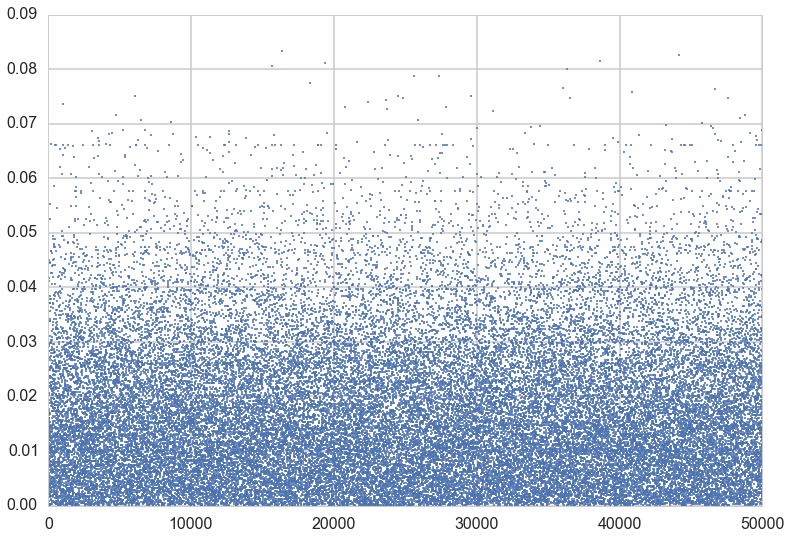

In [126]:
plt.plot(np.abs(corrs), '.', markersize=4, linestyle='None')

In [127]:
import statsmodels.api as sm
from statsmodels.formula.api import glm, ols

In [131]:
model = 'days_to_mat ~'
for i in range(50000):
    model = model + ' + ' + str(i)
glm_model = glm(model, df_merged).fit()
glm_model

RuntimeError: maximum recursion depth exceeded

In [81]:
## lets start on a variable we are interested in: Days to maturity
from sklearn.svm import LinearSVC

clfsvm = LinearSVC(loss="hinge")
Cs = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
Xmatrix = df_merged[snp_cols].values
Yresp = df_merged.days_to_mat.values

In [82]:
Xmatrix_train = Xmatrix[mask]
Xmatrix_test = Xmatrix[~mask]
Yresp_train = Yresp[mask]
Yresp_test = Yresp[~mask]

//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:417: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


KeyboardInterrupt: 